# **Import library and Load data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

In [ ]:
DATA_PATH = "../data/preprocessed/full.csv"  

df = pd.read_csv(DATA_PATH)

Shape: (13828, 15)


,address,area,city_province,district,front_road_width,interior,latitude,legal,longitude,n_bathrooms,n_bedrooms,n_floors,price,property_type,source
0,"Dự án Masteri Thảo Điền, Đường Xa Lộ Hà Nội, P...",75.0,Hồ Chí Minh,Quận 2,NaN,Đầy đủ,10.802441,Sổ đỏ/ Sổ hồng,106.741950,NaN,2.0,NaN,7.7,Căn hộ chung cư,batdongsancomvn
1,"Phúc Lợi, Phúc Lợi, Long Biên, Hà Nội",72.0,Hà Nội,Long Biên,6.10,Đầy đủ,21.038832,Sổ đỏ/ Sổ hồng,105.934539,6.0,6.0,6.0,15.8,Nhà riêng,batdongsancomvn
2,"Phường 12, Đà Lạt, Lâm Đồng",102.3,Lâm Đồng,Đà Lạt,5.00,Đầy đủ,11.973893,Sổ đỏ/ Sổ hồng,108.484595,1.0,2.0,2.0,7.5,Nhà riêng,batdongsancomvn
3,"Đường Phạm Văn Chiêu, Phường 9, Gò Vấp, Hồ Chí...",60.9,Hồ Chí Minh,Gò Vấp,4.35,Cơ bản,10.849654,Sổ đỏ/ Sổ hồng,106.651222,2.0,2.0,1.0,6.6,Nhà riêng,batdongsancomvn
4,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà Nội",148.0,Hà Nội,Nam Từ Liêm,6.50,Đầy đủ,21.011918,Sổ đỏ/ Sổ hồng,105.776275,41.0,41.0,10.0,59.0,Nhà riêng,batdongsancomvn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           13803 non-null  object 
 1   area              13793 non-null  float64
 2   city_province     13827 non-null  object 
 3   district          13827 non-null  object 
 4   front_road_width  9045 non-null   float64
 5   interior          5175 non-null   object 
 6   latitude          13520 non-null  float64
 7   legal             13004 non-null  object 
 8   longitude         13520 non-null  float64
 9   n_bathrooms       11486 non-null  float64
 10  n_bedrooms        11807 non-null  float64
 11  n_floors          10624 non-null  float64
 12  price             13265 non-null  float64
 13  property_type     13828 non-null  object 
 14  source            13828 non-null  object 
dtypes: float64(8), object(7)
memory usage: 1.6+ MB


In [9]:
# quick standardize strings

df.columns = df.columns.str.strip()

for col in ["city_province", "district", "property_type", "legal", "interior", "source"]:
    if col in df.columns:
        df[col] = df[col].astype("string").str.strip()

In [ ]:
num_cols = ["area", "front_width", "latitude", "longitude",
            "n_bedrooms", "n_bathrooms", "n_floors", "price"]

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors = "coerce")

# **Data Inspection**

## **Understand the Data**

In [12]:
# Example data

df.head(10)

,address,area,city_province,district,front_road_width,interior,latitude,legal,longitude,n_bathrooms,n_bedrooms,n_floors,price,property_type,source
0,"Dự án Masteri Thảo Điền, Đường Xa Lộ Hà Nội, P...",75.0,Hồ Chí Minh,Quận 2,NaN,Đầy đủ,10.802441,Sổ đỏ/ Sổ hồng,106.741950,NaN,2.0,NaN,7.70,Căn hộ chung cư,batdongsancomvn
1,"Phúc Lợi, Phúc Lợi, Long Biên, Hà Nội",72.0,Hà Nội,Long Biên,6.10,Đầy đủ,21.038832,Sổ đỏ/ Sổ hồng,105.934539,6.0,6.0,6.0,15.80,Nhà riêng,batdongsancomvn
2,"Phường 12, Đà Lạt, Lâm Đồng",102.3,Lâm Đồng,Đà Lạt,5.00,Đầy đủ,11.973893,Sổ đỏ/ Sổ hồng,108.484595,1.0,2.0,2.0,7.50,Nhà riêng,batdongsancomvn
3,"Đường Phạm Văn Chiêu, Phường 9, Gò Vấp, Hồ Chí...",60.9,Hồ Chí Minh,Gò Vấp,4.35,Cơ bản,10.849654,Sổ đỏ/ Sổ hồng,106.651222,2.0,2.0,1.0,6.60,Nhà riêng,batdongsancomvn
4,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà Nội",148.0,Hà Nội,Nam Từ Liêm,6.50,Đầy đủ,21.011918,Sổ đỏ/ Sổ hồng,105.776275,41.0,41.0,10.0,59.00,Nhà riêng,batdongsancomvn
5,"Hẻm 66/26K, Đường Xô Viết Nghệ Tĩnh, Phường 21...",47.0,Hồ Chí Minh,Bình Thạnh,3.50,Cơ bản,10.797871,Sổ đỏ/ Sổ hồng,106.710850,2.0,2.0,2.0,5.20,Nhà riêng,batdongsancomvn
6,"Phố Ngọc Khánh, Phường Giảng Võ, Ba Đình, Hà...",50.0,Hà Nội,Ba Đình,NaN,Đầy đủ,21.025739,Sổ đỏ/ Sổ hồng,105.818377,4.0,4.0,4.0,11.80,Nhà riêng,batdongsancomvn
7,"Đường Nguyễn Văn Hoa, Phường Thống Nhất, Biên ...",63.4,Đồng Nai,Biên Hòa,5.00,Đầy đủ.,10.953224,Sổ đỏ/ Sổ hồng,106.838593,3.0,3.0,3.0,4.90,Nhà riêng,batdongsancomvn
8,"Đường Lý Phục Man, Phường Bình Thuận, Quận 7, ...",48.0,Hồ Chí Minh,Quận 7,NaN,Đầy đủ,10.743100,Sổ đỏ/ Sổ hồng,106.725904,4.0,4.0,4.0,10.50,Nhà riêng,batdongsancomvn
9,"Đường Bồ Đề, Phường Bồ Đề, Long Biên, Hà Nội",30.0,Hà Nội,Long Biên,4.20,Đầy đủ,21.037762,Sổ đỏ/ Sổ hồng,105.871950,3.0,2.0,4.0,7.89,Nhà riêng,batdongsancomvn


The first 10 records of the dataset, this is an example of our data.

In [13]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (13828, 15)


The dataset dimension is (13728, 11), which means that it has 13728 rows and 11 columns.

In [14]:
# Dataset information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           13803 non-null  object 
 1   area              13793 non-null  float64
 2   city_province     13827 non-null  string 
 3   district          13827 non-null  string 
 4   front_road_width  9045 non-null   float64
 5   interior          5175 non-null   string 
 6   latitude          13520 non-null  float64
 7   legal             13004 non-null  string 
 8   longitude         13520 non-null  float64
 9   n_bathrooms       11486 non-null  float64
 10  n_bedrooms        11807 non-null  float64
 11  n_floors          10624 non-null  float64
 12  price             13265 non-null  float64
 13  property_type     13828 non-null  string 
 14  source            13828 non-null  string 
dtypes: float64(8), object(1), string(6)
memory usage: 1.6+ MB
None


Based on the data overview above, the dataset contains **13,828 records** and **15 columns**, describing various attributes of real estate properties collected from Vietnamese real estate platforms.
1. **address**  
   Full textual address of the property (string).  
   This field may include project name, street, ward, district, and city.
2. **area**  
   Total area of the property in square meters (float).
3. **city_province**  
   City or province where the property is located (categorical string).
4. **district**  
   District-level administrative area of the property (categorical string).
5. **front_width**  
   Width of the road in front of the property, measured in meters (float).  
   This attribute contains a large number of missing values, especially for apartments and alley houses.
6. **interior**  
   Interior furnishing status of the property (categorical string), such as *Đầy đủ*, *Cơ bản*, *Không nội thất*, or detailed descriptions.
7. **latitude**  
   Latitude coordinate of the property location (float).
8. **legal**  
   Legal status of the property (categorical string), e.g. *Sổ đỏ / Sổ hồng*, *Hợp đồng mua bán*, *Đang chờ sổ*.
9. **longitude**  
   Longitude coordinate of the property location (float).
10. **n_bathrooms**  
    Number of bathrooms/toilets in the property (float).  
    This attribute is partially missing for many listings.
11. **n_bedrooms**  
    Number of bedrooms in the property (float).  
    Missing values vary by property type.
12. **n_floors**  
    Number of floors of the property (float).  
    Many missing values occur for apartments, where this feature is not applicable.
13. **price**  
    Price of the property in **billion VND** (float).  
    This is the **target variable** of the analysis.
14. **property_type**  
    Type of property (categorical string), such as *Nhà riêng*, *Nhà mặt phố*, *Căn hộ chung cư*, or *Nhà biệt thự, liền kề*.
15. **source**  
    Source website from which the listing was scraped (categorical string).

### Data Quality Notes
- The dataset contains both **numerical** and **categorical** features.
- Several attributes contain missing values, notably:
  - `front_road_width`
  - `interior`
  - `n_bathrooms`
  - `n_bedrooms`
  - `n_floors`
- Missing values are often **related to property type**, rather than occurring completely at random.
- The `price` attribute is used as the primary response variable in subsequent analysis.

In [ ]:
# Statistical summary for numerical features

pd.options.display.float_format = '{:.2f}'.format

df_numeric = df.select_dtypes(include = ['number'])
df_filtered = df_numeric[df_numeric > 0]

print(df_filtered.describe())

          area  front_road_width  latitude  longitude  n_bathrooms  n_bedrooms  n_floors    price
count 13793.00           9045.00  13519.00   13519.00     10703.00    11401.00   8562.00 13265.00
mean    195.85              7.77     14.07     106.68         3.71        4.04      3.34    19.33
std     738.72              8.25      4.54       0.86         4.72        4.67      1.92    52.78
min       1.00              2.00      9.18     103.84         1.00        1.00      1.00     0.10
25%      60.60              4.30     10.77     105.97         2.00        2.00      2.00     3.60
50%      85.00              5.00     10.87     106.67         3.00        3.00      3.00     7.70
75%     138.50              8.00     20.86     106.75         4.00        4.00      4.00    16.50
max   26247.00            149.00     22.34     109.31       200.00      188.00     56.00   850.00


This table provides an overview of the numerical features in the house price dataset:

1. **Counts**:
   - Indicates the number of non-missing values for each numerical attribute.
   - Example: **area** has 13,793 valid entries, while **n_floors** has only 8,562 entries, indicating a substantial amount of missing data.

2. **Mean (Average)**:
   - Reflects the central tendency of each feature.
   - Example: The average **area** is **195.85 m²**, and the average **price** is **19.33 billion VND**.

3. **Standard Deviation (std)**:
   - Shows the variability in the data.
   - Example: **area** has a standard deviation of **738.72**, and **price** has a standard deviation of **52.78**, indicating high dispersion and the possible presence of extreme values.

4. **Min and Max**:
   - Display the range of values.
   - Example: **area** ranges from **1 m²** to **26,247 m²**, and **price** ranges from **0.10** to **850 billion VND**, suggesting the existence of significant outliers.

5. **Percentiles (25%, 50%, 75%)**:
   - Show the distribution of values.
   - Example: The median **price** (50%) is **7.70 billion VND**, which is lower than the mean (19.33), indicating a right-skewed price distribution.

### Key Observations:
- **Missing Data**: Missing values are notable in several columns, especially **front_road_width** and **n_floors**.
- **Outliers**: Likely present in features such as **area**, **n_bedrooms**, **n_bathrooms**, and **price**.
- **Data Preprocessing Implications**: The wide range of values and differing scales across numerical features suggest that further steps such as transformation, normalization, or robust handling of outliers may be necessary in subsequent analysis.

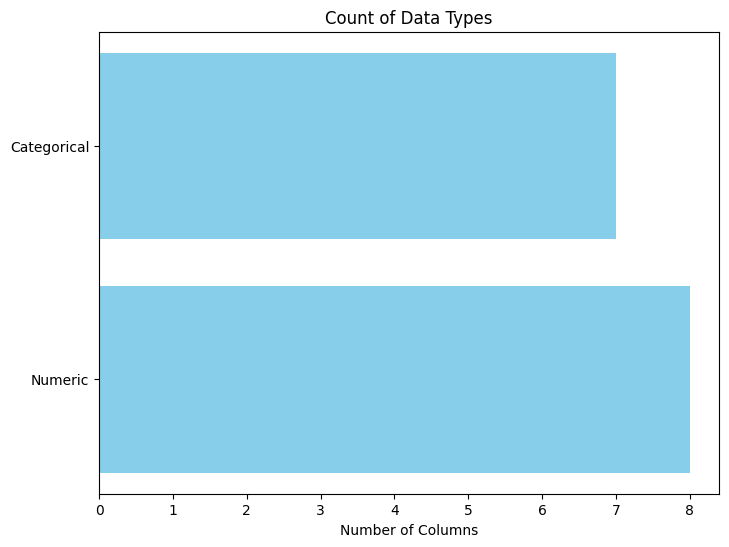

In [ ]:
# Visualize column types

numeric_columns = df.select_dtypes(include = ['number']).columns
categorical_columns = df.select_dtypes(exclude = ['number']).columns

column_type_count = {'Numeric': len(numeric_columns), 'Categorical': len(categorical_columns)}

plt.figure(figsize = (8, 6))
plt.barh(list(column_type_count.keys()), list(column_type_count.values()), color = 'skyblue')
plt.title("Count of Data Types")
plt.xlabel("Number of Columns")
plt.show()


## **Checking Missing Value**

In [19]:
# Checking Null values

print("Number of missing values for each column: ")
df.isnull().sum()

Number of missing values for each column: 


address               25
area                  35
city_province          1
district               1
front_road_width    4783
interior            8653
latitude             308
legal                824
longitude            308
n_bathrooms         2342
n_bedrooms          2021
n_floors            3204
price                563
property_type          0
source                 0
dtype: int64

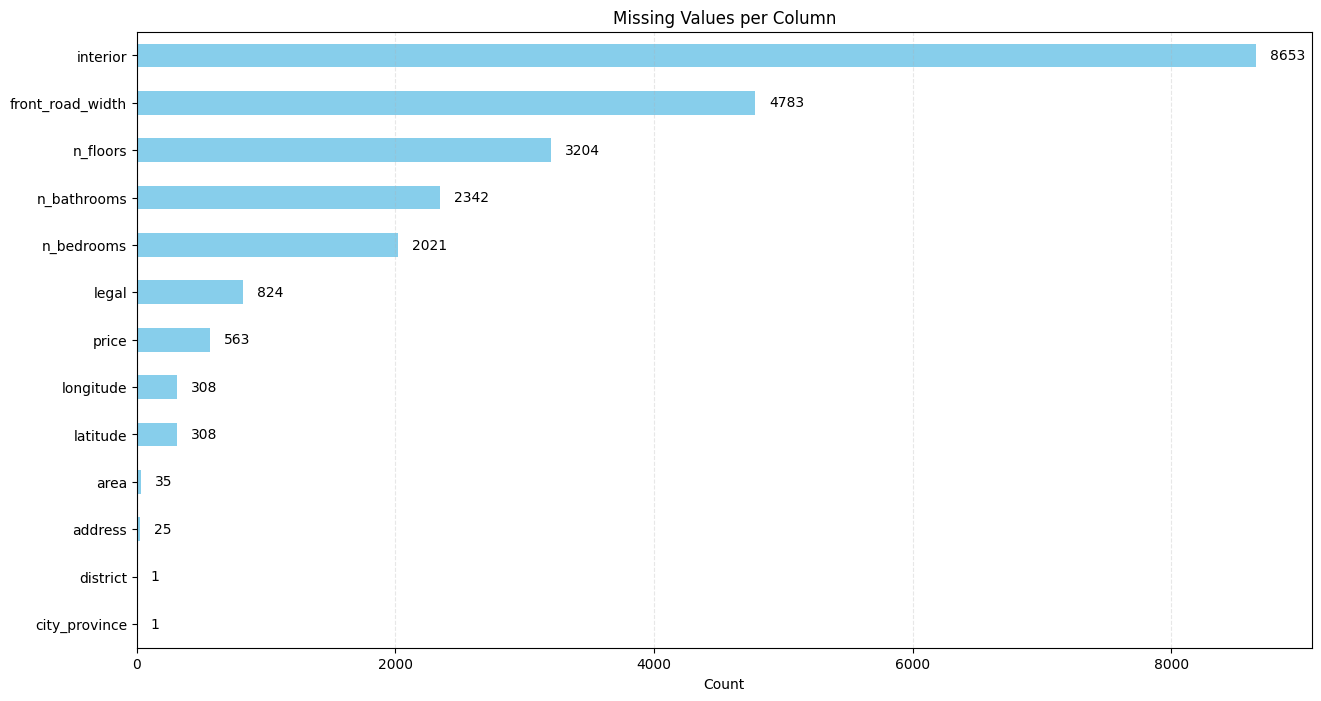

In [ ]:
# Visualize missing value

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = True)

if not missing_values.empty:
    ax = missing_values.plot(kind = 'barh', color = 'skyblue', figsize = (10, 8))
    plt.title("Missing Values per Column")
    plt.xlabel("Count")

    plt.subplots_adjust(right = 1.3)

    for p in ax.patches:
        ax.annotate(f'{p.get_width()}',
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                    xytext = (10, 0),
                    textcoords = 'offset points',
                    ha = 'left', va = 'center')

    plt.grid(axis = 'x', linestyle = '--', alpha = 0.3)

    plt.show()
else:
    print("No missing values found.")

The chart illustrates the distribution of missing values across the columns in the dataset. Key columns such as **interior** (8,653 missing values), **front_width** (4,783 missing values), and **n_floors** (3,204 missing values) contain a significant amount of incomplete data, indicating potential challenges in utilizing these features effectively. Columns like **n_bathrooms** (2,342 missing values) and **n_bedrooms** (2,021 missing values) also show a noticeable level of missing data.

On the other hand, some columns have relatively few missing values. Attributes such as **area** (35 missing values), **address** (25 missing values), **city_province** (1 missing value), and **district** (1 missing value) are largely complete. The target variable, **price**, has 563 missing values, which is notable given its importance for analysis and modeling.

Overall, while the dataset provides a solid foundation, handling missing values appropriately will be essential to ensure reliable analysis and modeling results.

In [24]:
# Calculate the missing percentage for each column

missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Missing Percentage for Each Column(%):")
print(missing_percentage)

Missing Percentage for Each Column(%):
interior           62.58
front_road_width   34.59
n_floors           23.17
n_bathrooms        16.94
n_bedrooms         14.62
legal               5.96
price               4.07
latitude            2.23
longitude           2.23
area                0.25
address             0.18
city_province       0.01
district            0.01
dtype: float64


In [31]:
property_type_labels = (
    df["property_type"]
    .dropna()
    .astype(str)
    .str.strip()
    .sort_values()
    .unique()
)

print("Number of unique property_type labels:", len(property_type_labels))
for label in property_type_labels:
    print("-", label)

Number of unique property_type labels: 10
- Biệt thự
- Biệt thự, Villa
- Căn hộ chung cư
- Mặt tiền
- Nhà biệt thự, liền kề
- Nhà hẻm ngõ
- Nhà hẻm, ngõ
- Nhà mặt phố
- Nhà mặt tiền
- Nhà riêng


Real estate properties in this dataset are grouped into three estate categories: **Apartment**, **Landed_alley**, and **Landed_street**. These groups represent different structural characteristics of properties, which may lead to systematic missing values in certain attributes. Therefore, we analyze the percentage of missing values for each attribute with respect to the estate group in order to identify potential MNAR and MCAR patterns.

/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/1618991793.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.isna().mean() * 100)


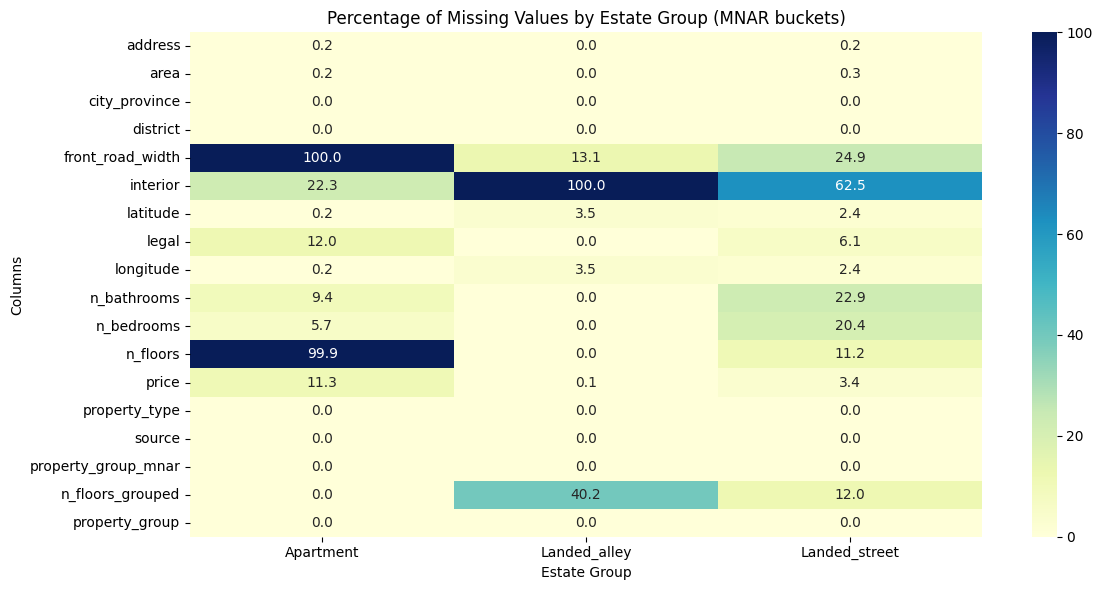

In [ ]:
# --- Group property types into 3 buckets for MNAR/MCAR analysis ---
def map_property_group(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x).strip().lower()
    if "căn hộ" in x:
        return "Apartment"
    if ("hẻm" in x) or ("ngõ" in x):
        return "Landed_alley"
    return "Landed_street"

df["property_group"] = df["property_type"].apply(map_property_group)

# --- Missing % by grouped estate type ---
missing_pct = (
    df.groupby("property_group")
      .apply(lambda g: g.isna().mean() * 100)
)

# heatmap expects rows=columns, cols=groups
missing_pct = missing_pct.T

plt.figure(figsize = (12, 6))
sns.heatmap(missing_pct, annot = True, cmap = "YlGnBu", fmt = ".1f")
plt.title("Percentage of Missing Values by Estate Group (MNAR buckets)")
plt.ylabel("Columns")
plt.xlabel("Estate Group")
plt.tight_layout()
plt.show()

The heatmap above shows the percentage of missing values by estate group. We can see that in **Apartment** type, there are significant missing values in **front_width** and **n_floors** (nearly **100%**) since these attributes do not exist for Apartments. Similarly, **Landed_alley** has a very high missing rate in **interior** (**100%**), while most other attributes are nearly complete. Finally, the percentage of missing values in **Landed_street** is moderate (around **20–25%** for **front_width**, **n_bathrooms**, **n_bedrooms**), except in **interior**, when it increases considerably to **62.5%**.

# **Exploratory Data Analytics**



```
# This is formatted as code
```

## **Single Numerical Feature Analysis**

### Histplot for `price`, `area`, `front_width`

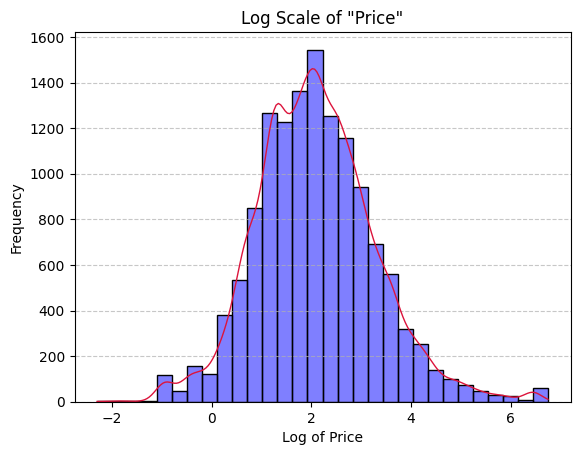

In [33]:
# Histplot for log value of "price"

ax = sns.histplot(np.log(df['price']), kde=True, bins=30, color='blue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of "Price"')
plt.xlabel("Log of Price")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

House prices in this dataset exhibit a right-skewed distribution due to a small number of very expensive properties. The log transformation reduces the skewness of the price distribution; however, the resulting distribution is not perfectly bell-shaped, likely due to the presence of multiple property types and price segments. This transformation still helps mitigate the impact of extreme values and improves the representation of the typical housing market.

**Key Insights**
1. **Market Segmentation**:
   - Most properties are concentrated around the peak of the log-price distribution, indicating a **middle-market focus**. However, the distribution shows slight asymmetry, suggesting that the dataset consists of multiple underlying price segments rather than a single homogeneous market.

2. **Outlier Handling**:
   - High-priced properties remain visible in the right tail even after log transformation. These luxury homes should be carefully treated, for example through capping or separate modeling, to avoid skewing predictions for mid-range properties.

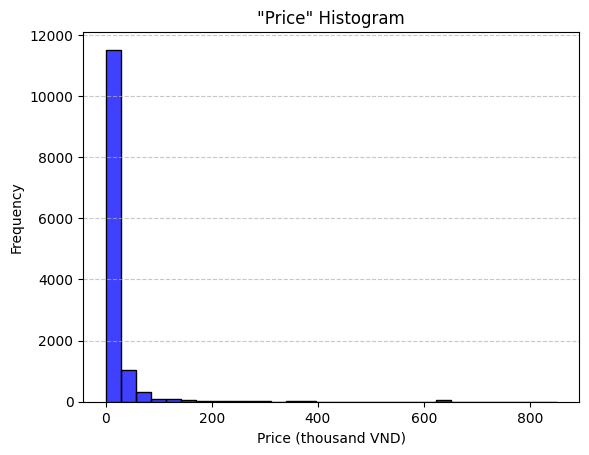

In [36]:
ax = sns.histplot(df['price'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})
# ax.lines[0].set_color('crimson')

plt.title('"Price" Histogram')
plt.xlabel("Price (thousand VND)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

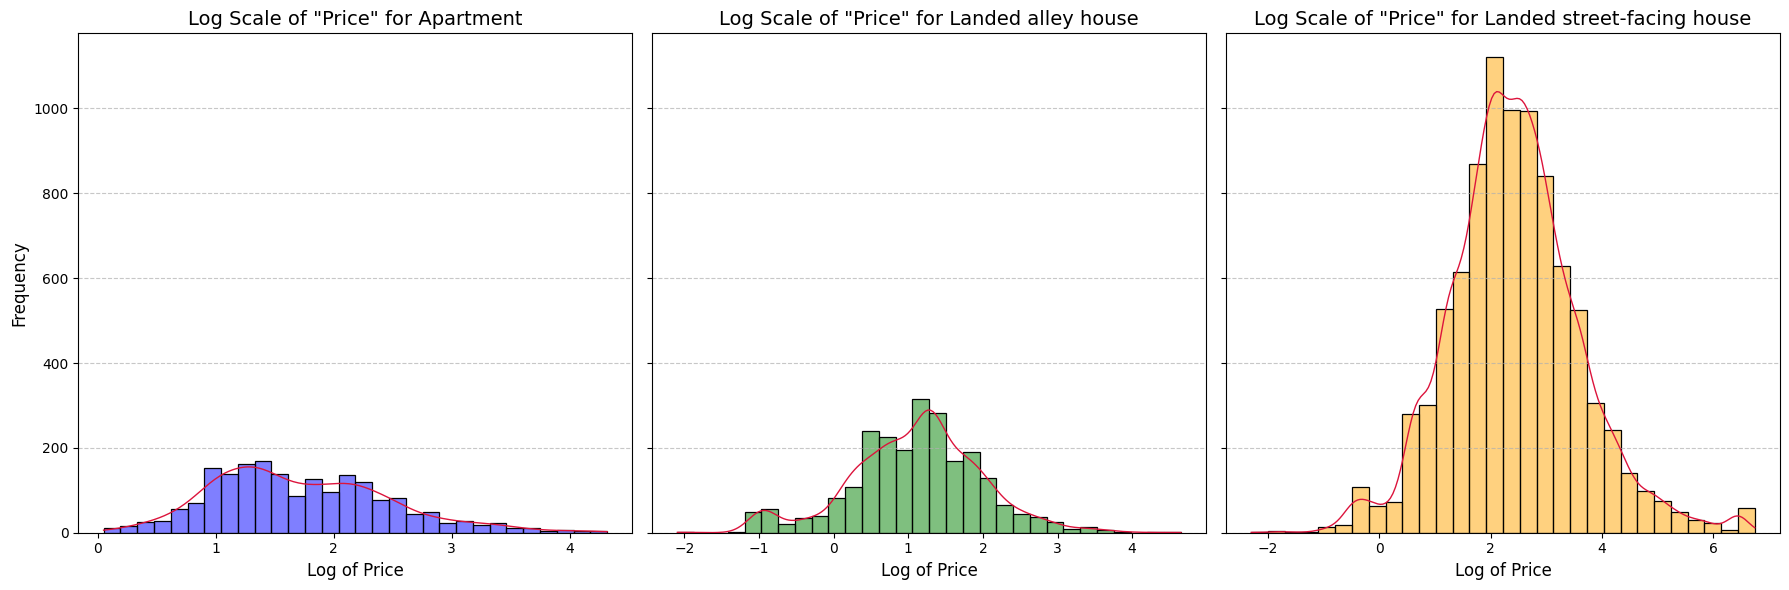

In [ ]:
# Log scale of Price for each type

type_mapping = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

types = ['Apartment', 'Landed_alley', 'Landed_street']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['property_group'] == t]
    ax = sns.histplot(
        np.log(subset['price']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Price" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Price", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


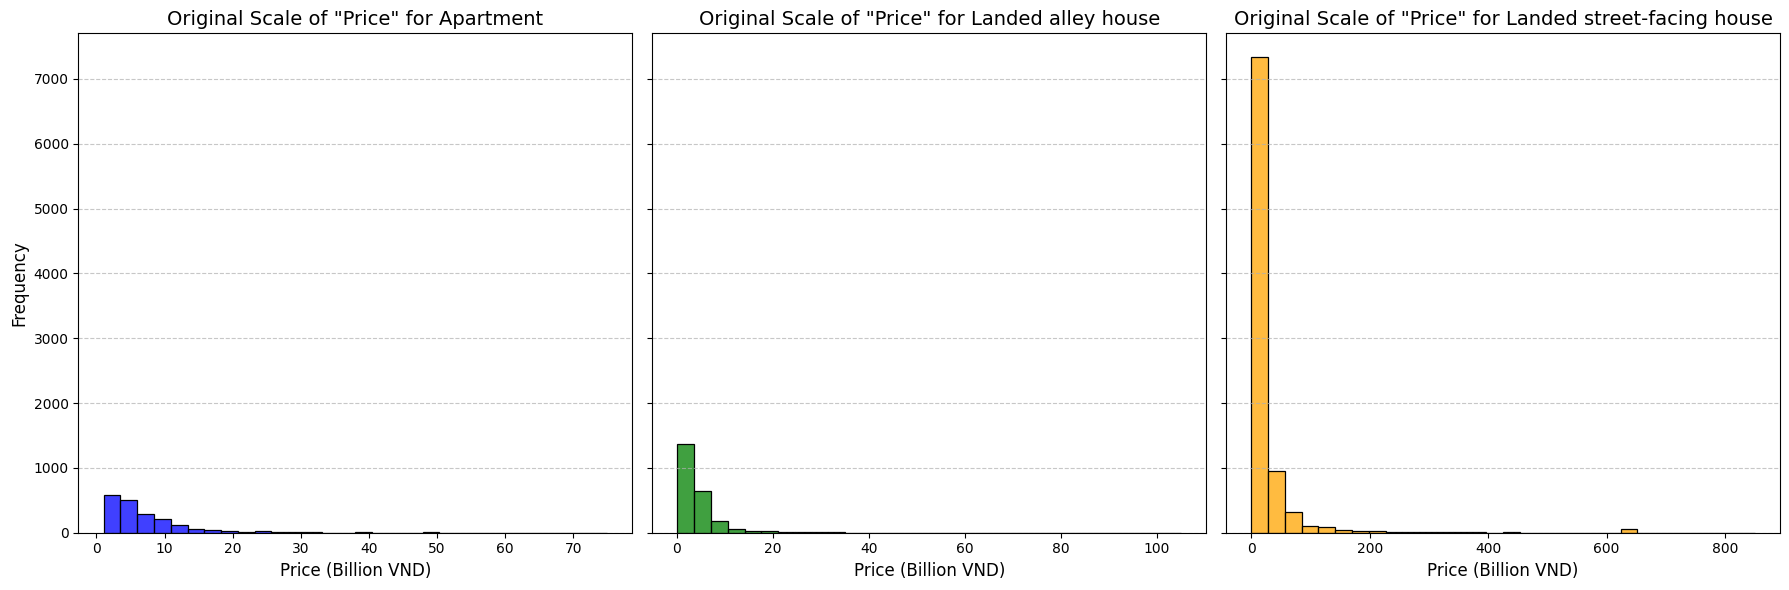

In [ ]:
# Original value of Price for each type

type_mapping = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

types = ['Apartment', 'Landed_alley', 'Landed_street']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['property_group'] == t]
    ax = sns.histplot(
        subset['price'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Price" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Price (Billion VND)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


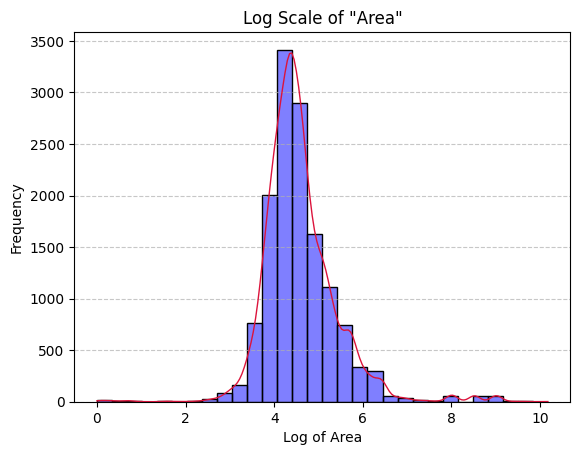

In [41]:
# Histplot for log value of "area"

ax = sns.histplot(np.log(df['area']), kde=True, bins=30, color='blue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of "Area"')
plt.xlabel("Log of Area")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart shows the distribution of the log of Area, with a prominent peak around 4.5 and a long tail to the right. The distribution appears to be right-skewed, indicating that there are more smaller areas than larger ones.

**Key Insights**:
1. **Effectiveness of Log Transformation**:
   - The transformation has normalized the skewed distribution of property areas, making the data more suitable for predictive modeling.

2. **Typical Property Sizes**:
   - Most properties in the dataset have an area around \( $e^4$ = 54.6 \) square meters.

3. **Market Representation**:
   - The dataset predominantly contains small to medium-sized properties. The few large properties might represent premium or rural areas.

4. **Outlier Handling**:
   - The large properties in the right tail could introduce variability in the model. If predicting house prices, consider analyzing these separately or using feature engineering to account for their distinct characteristics.


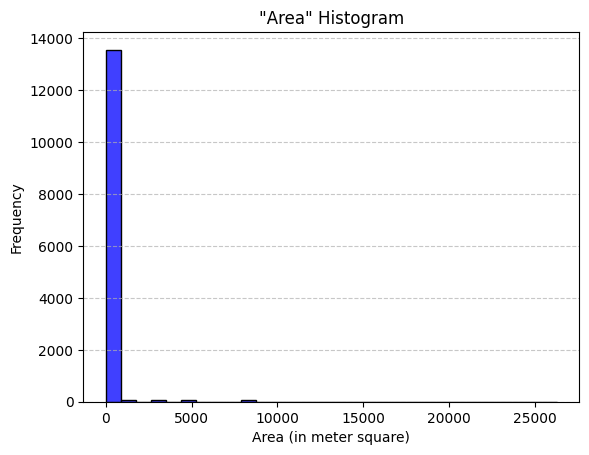

In [42]:
ax = sns.histplot(df['area'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})
# ax.lines[0].set_color('crimson')

plt.title('"Area" Histogram')
plt.xlabel("Area (in meter square)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

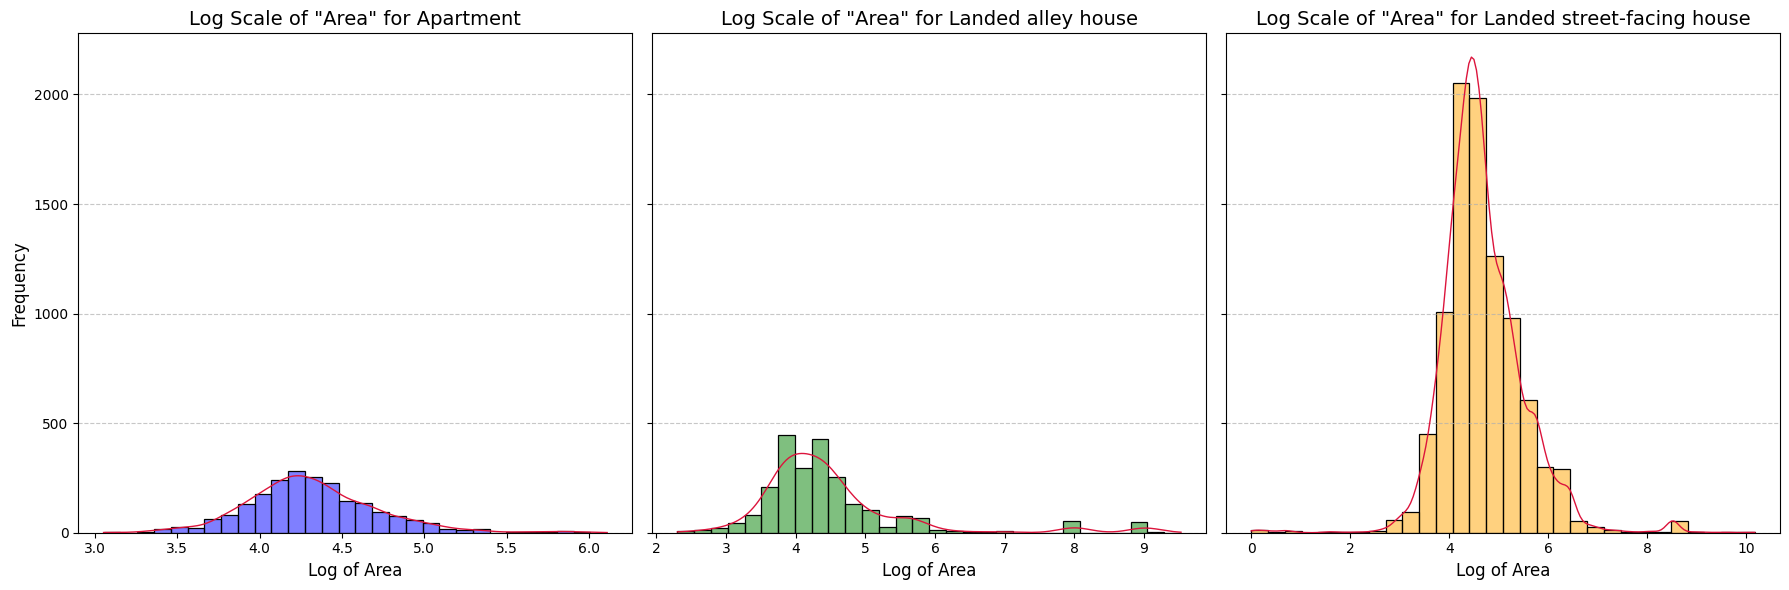

In [ ]:
# Log scale of Area for each type

type_mapping = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

types = ['Apartment', 'Landed_alley', 'Landed_street']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['property_group'] == t]
    ax = sns.histplot(
        np.log(subset['area']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Area" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Area", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


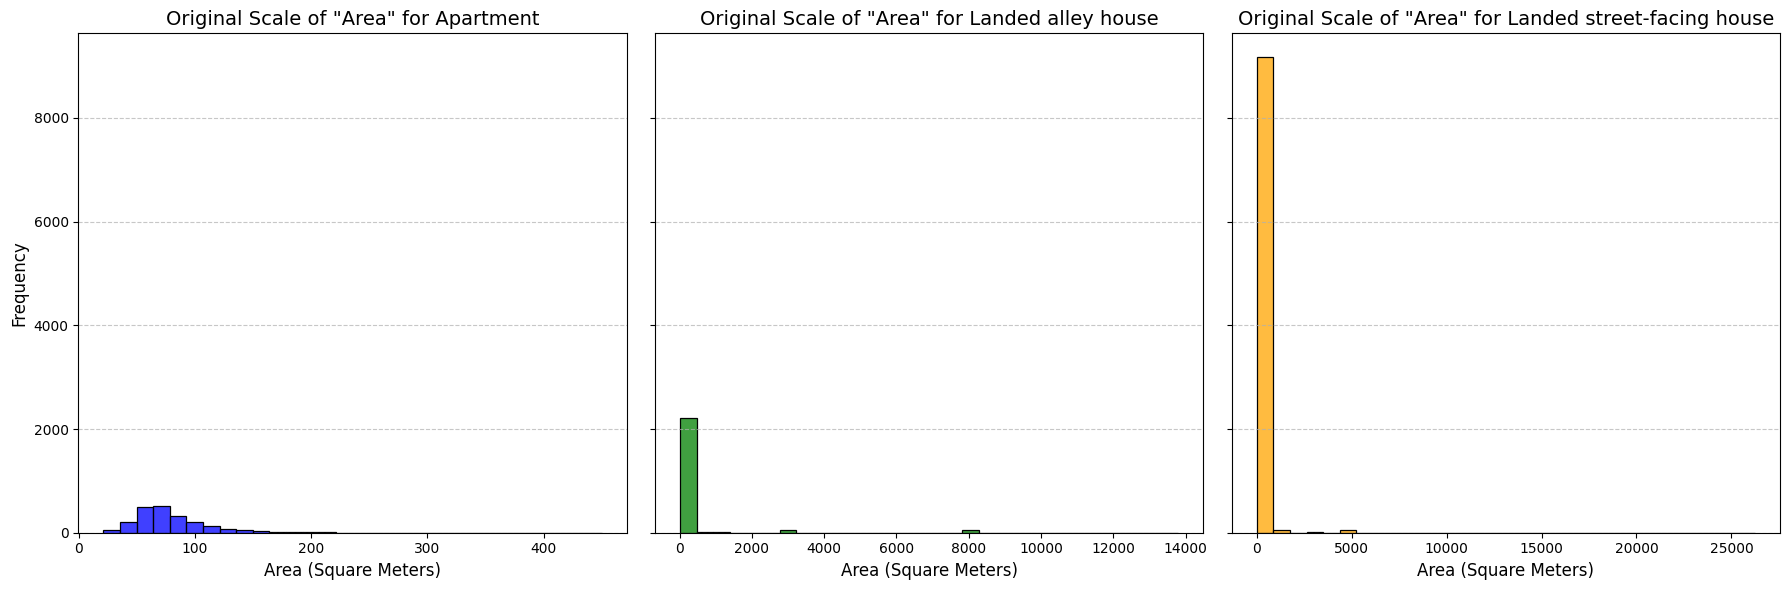

In [ ]:
# Original value of Area for each type

type_mapping = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

types = ['Apartment', 'Landed_alley', 'Landed_street']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['property_group'] == t]
    ax = sns.histplot(
        subset['area'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Area" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Area (Square Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize = 12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


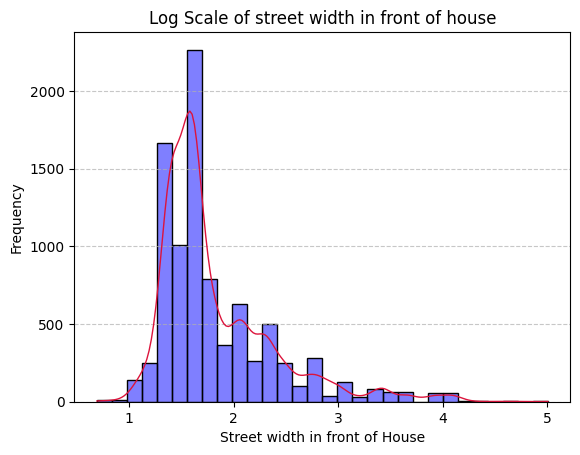

In [ ]:
ax = sns.histplot(np.log(df['front_width']), kde = True, bins = 30, color = 'blue', line_kws = {'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of width in front of house')
plt.xlabel("Width")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This chart represents the distribution of the **log scale** of street widths in front of houses.

**1. Distribution Characteristics**
- The distribution is **right-skewed**, indicating that most properties are located on relatively narrow streets, while wider streets appear less frequently.
- The peak frequency is observed around a log value of **1.5–1.7**, corresponding approximately to street widths of **4–6 meters** on the original scale.

**2. Most Common Street Width Range**
- The majority of houses are situated along streets with widths between **3–8 meters** (log values roughly between **1.1 and 2.1**).
- Streets wider than this range become progressively less common, with frequencies decreasing noticeably beyond log values of **2.3** (around 10 meters).

**3. Rare Occurrences of Extremely Narrow or Wide Streets**
- Very narrow streets (log values close to **1**, corresponding to widths around **2–3 meters**) appear but with relatively low frequency.
- Extremely wide streets (log values above **3**, equivalent to widths greater than **20 meters**) are rare in the dataset.

**4. Implications for House Pricing**
- Properties located on wider streets may benefit from better accessibility and higher commercial potential, which can positively influence prices.
- Houses on narrower streets are more common and likely represent dense residential areas, where pricing dynamics may be driven more by location than street width alone.

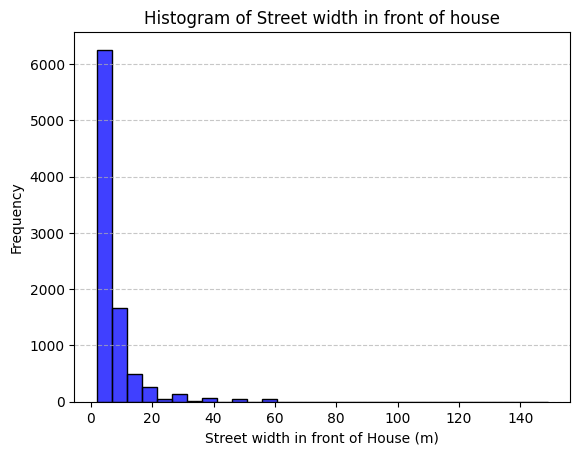

In [ ]:
ax = sns.histplot(df['front_width'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})
#ax.lines[0].set_color('crimson')

plt.title('Histogram of width in front of house')
plt.xlabel("Width in front of House (m)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

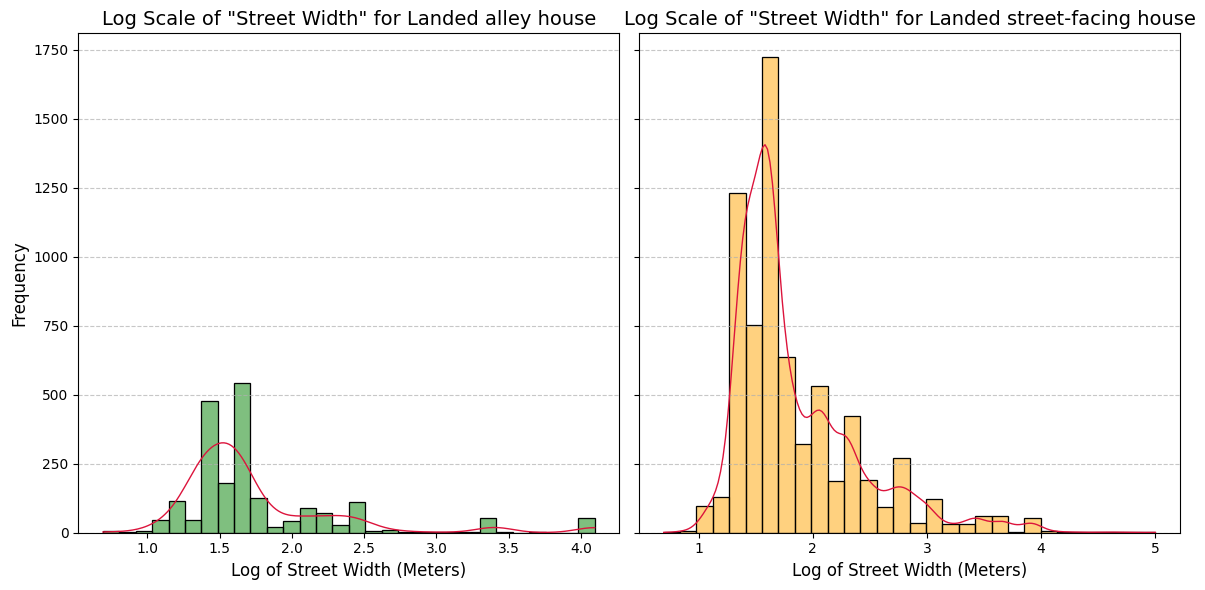

In [ ]:
type_mapping = {
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

types = ['Landed_alley', 'Landed_street']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['property_group'] == t]
    ax = sns.histplot(
        np.log(subset['front_width']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Width" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Width (Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


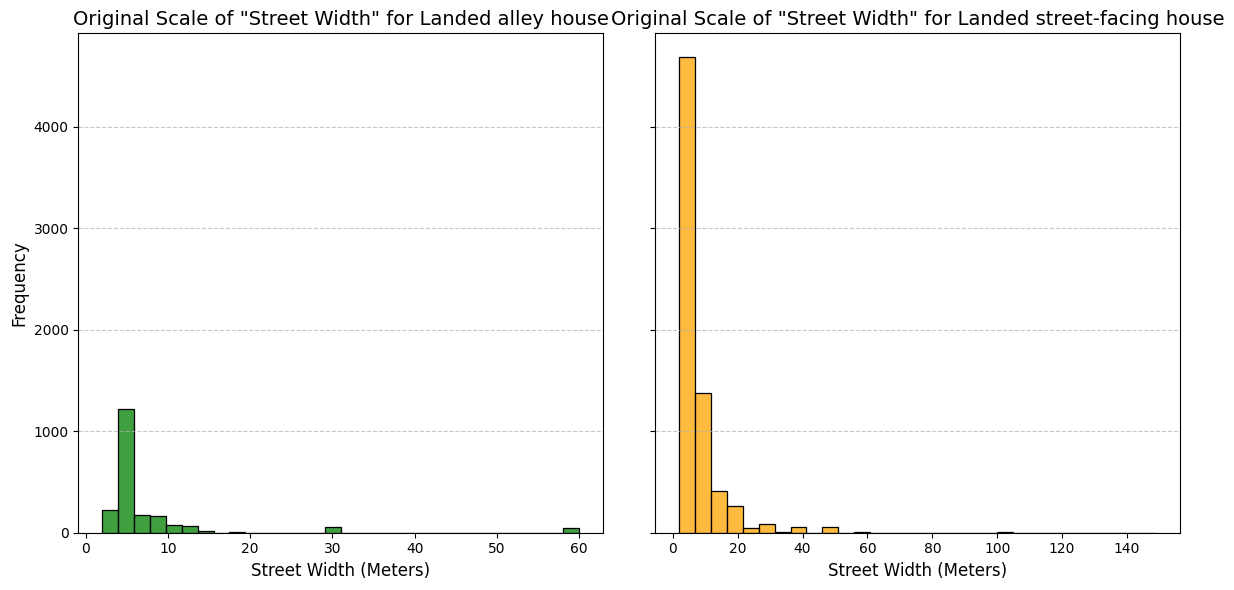

In [ ]:
type_mapping = {
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

types = ['Landed_alley', 'Landed_street']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['property_group'] == t]
    ax = sns.histplot(
        subset['front_width'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Street Width" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Street Width (Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()


### Bar chart for `n_floors`, `n_bathrooms`, `n_bedrooms`

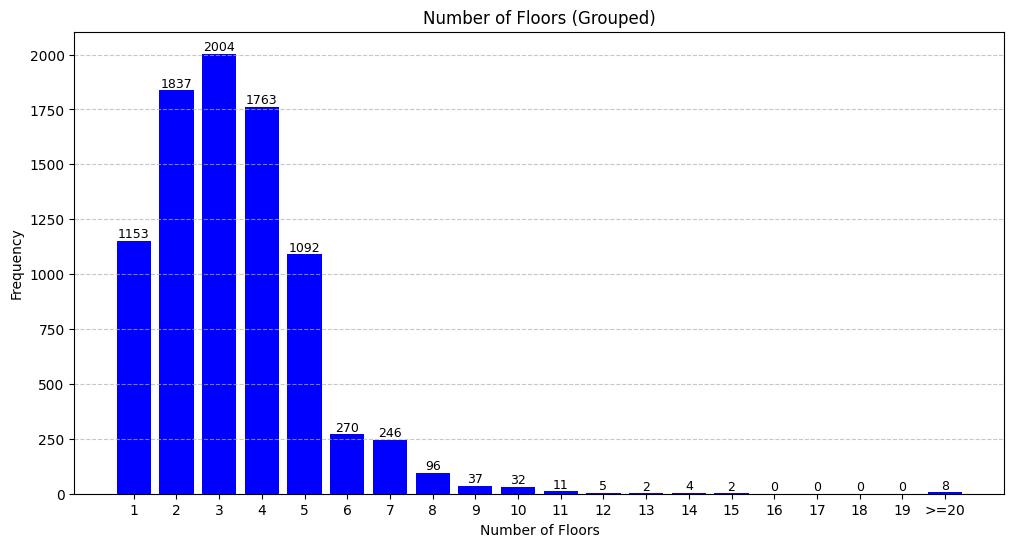

In [71]:
df2 = df.dropna(subset=["n_floors"]).copy()

df2["n_floors_grouped"] = df2["n_floors"].apply(lambda x: int(x) if int(x) < 20 else ">=20")
floor_order = list(range(1, 20)) + [">=20"]
df2["n_floors_grouped"] = pd.Categorical(df2["n_floors_grouped"], categories=floor_order, ordered=True)

floor_counts = df2["n_floors_grouped"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(floor_counts.index.astype(str), floor_counts.values, color="blue")
plt.title("Number of Floors (Grouped)")
plt.xlabel("Number of Floors")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)),
             ha="center", va="bottom", fontsize=9)

plt.show()

The chart depicts the distribution of houses based on their number of floors. The distribution is highly right-skewed, meaning there are many houses with fewer floors and fewer houses with a higher number of floors. The majority of houses in this dataset have between 1 and 7 floors.

**Key Insights:**

1. **Majority of Houses are Low-Rise:**
   - The highest frequency is observed for houses with 4 floors, indicating that this is the most common type of house in the dataset.
   - A significant proportion of houses also have 1, 2, 3, and 5 floors.
   - The frequency decreases rapidly as the number of floors increases, suggesting that high-rise buildings are less common.

2. **Scarcity of High-Rise Buildings:**
   - The number of houses with more than 10 floors is negligible.
   - This suggests that the dataset primarily focuses on residential or low-rise commercial buildings.

**Potential Implications for House Price Prediction:**

1. **Number of Floors as a Feature:**
   - The number of floors is likely to be a relevant feature for house price prediction models.
   - Houses with more floors may generally command higher prices, but the relationship might not be linear due to the skewed distribution.

2. **Model Complexity:**
   - Given the non-linear relationship between floors and price, a complex model like a decision tree or a neural network might be necessary to capture the nuances.

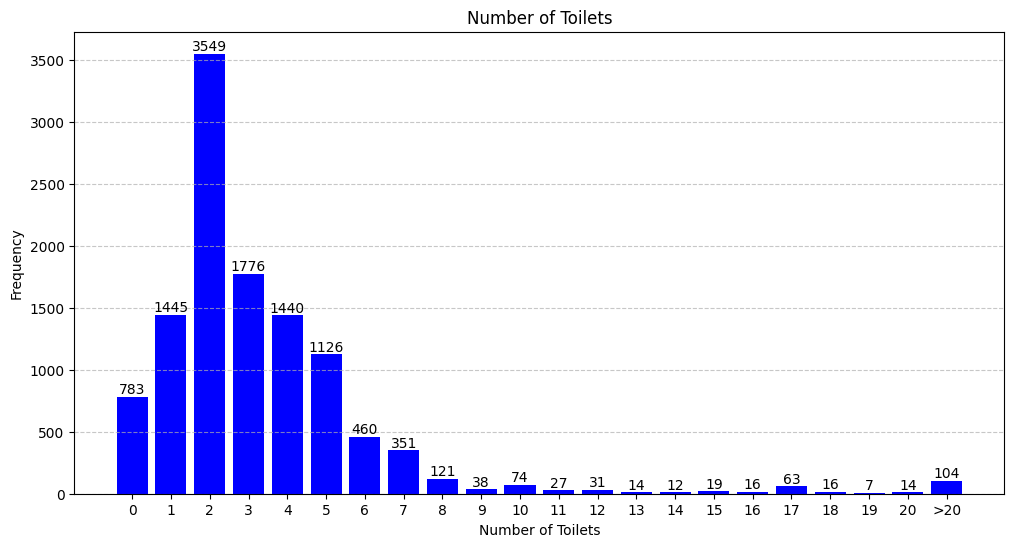

In [72]:
# Visualize number of "n_bathrooms"

toilet_counts = df['n_bathrooms'].value_counts().sort_index()

toilet_counts_filtered = toilet_counts[toilet_counts.index <= 20]
toilet_counts_filtered.index = toilet_counts_filtered.index.astype(int)


toilet_counts_above_20 = toilet_counts[toilet_counts.index > 20].sum()
if toilet_counts_above_20 > 0:
    toilet_counts_filtered['>20'] = toilet_counts_above_20

toilet_counts_filtered.index = list(map(str, toilet_counts_filtered.index))

plt.figure(figsize=(12, 6))
bars = plt.bar(toilet_counts_filtered.index, toilet_counts_filtered.values, color='blue')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of Toilets')
plt.xlabel("Number of Toilets")
plt.ylabel("Frequency")

# Add number on the right
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


The chart depicts the distribution of houses based on their number of toilets. The distribution is highly right-skewed, meaning there are many houses with fewer toilets and fewer houses with a higher number of toilets. Notably, the dataset also contains a non-negligible number of houses with **0 toilets**, which may correspond to incomplete listings or non-residential properties. Overall, the majority of houses have between **1 and 6 toilets**.

**Key Insights:**

1. **Majority of Houses Have Few Toilets:**
   - The highest frequency is observed for houses with **2 toilets**, making this the most common category in the dataset.
   - Houses with **1, 3, and 4 toilets** also appear frequently.
   - Houses with **0 toilets** form a visible group, indicating potential missing or atypical records that require further attention.
   - The frequency decreases rapidly as the number of toilets increases.

2. **Scarcity of Houses with Many Toilets:**
   - Houses with more than **10 toilets** are rare.
   - This suggests that the dataset is dominated by residential or small-scale buildings rather than large commercial properties.

**Potential Implications for House Price Prediction:**

1. **Number of Toilets as a Feature:**
   - The number of toilets is likely to be a relevant feature for house price prediction.
   - However, records with **0 toilets** may need special handling (e.g., imputation or filtering) to avoid misleading the model.

2. **Model Complexity:**
   - Due to the skewed and non-linear distribution, models capable of handling non-linearity (e.g., tree-based models) may be more suitable than simple linear models.

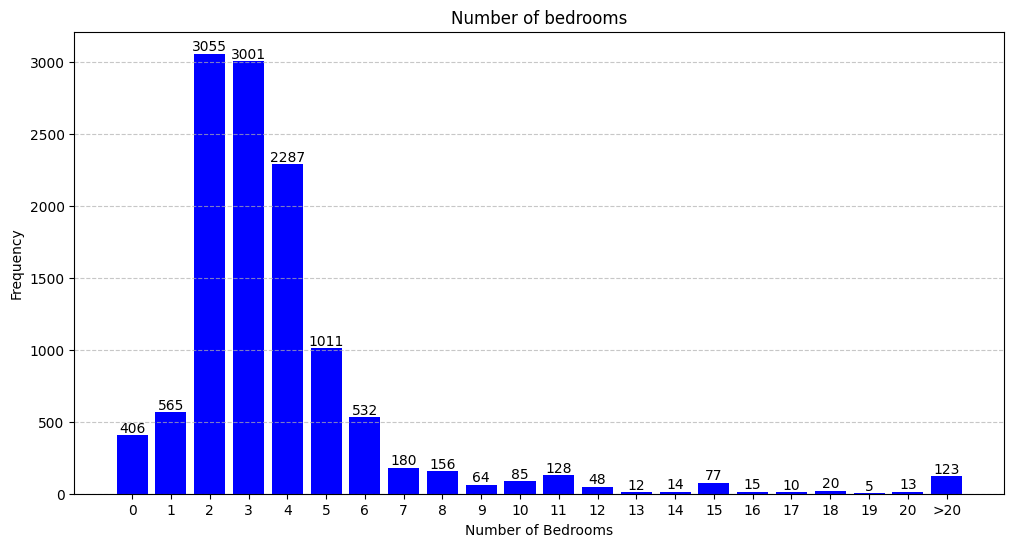

In [73]:
bedroom_counts = df['n_bedrooms'].value_counts().sort_index()

bedroom_counts_filtered = bedroom_counts[bedroom_counts.index <= 20]
bedroom_counts_filtered.index = bedroom_counts_filtered.index.astype(int)


bedroom_counts_above_20 = bedroom_counts[bedroom_counts.index > 20].sum()
if bedroom_counts_above_20 > 0:
    bedroom_counts_filtered['>20'] = bedroom_counts_above_20


bedroom_counts_filtered.index = list(map(str, bedroom_counts_filtered.index))

plt.figure(figsize=(12, 6))
bars = plt.bar(bedroom_counts_filtered.index, bedroom_counts_filtered.values, color='blue')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of bedrooms')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")

# Add number on the right
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


The chart depicts the distribution of houses based on their number of bedrooms. The distribution is highly right-skewed, meaning there are many houses with fewer bedrooms and fewer houses with a higher number of bedrooms. The majority of houses in this dataset have between **2 and 4 bedrooms**, with a noticeable peak at **2–3 bedrooms**.

**Key Insights:**

1. **Majority of Houses Have Few Bedrooms:**
   - The highest frequency is observed for houses with **2 bedrooms**, followed closely by **3 bedrooms**, making these the most common types in the dataset.
   - Houses with **4 bedrooms** also appear in significant numbers.
   - A non-negligible number of records have **0 bedrooms**, which may correspond to incomplete listings or non-standard property types.
   - The frequency decreases rapidly as the number of bedrooms increases.

2. **Scarcity of Houses with Many Bedrooms:**
   - Houses with more than **10 bedrooms** are rare.
   - This indicates that the dataset is dominated by typical residential properties rather than large-scale commercial or luxury estates.

**Potential Implications for House Price Prediction:**

1. **Number of Bedrooms as a Feature:**
   - The number of bedrooms is likely to be an important feature for house price prediction.
   - However, records with **0 bedrooms** may require special handling to avoid introducing noise into the model.

2. **Model Complexity:**
   - Due to the skewed and non-linear relationship between bedrooms and price, non-linear models such as tree-based methods may better capture the underlying patterns.

## **Multiple Numerical Feature Analysis**

### Heatmap of correlation matrix

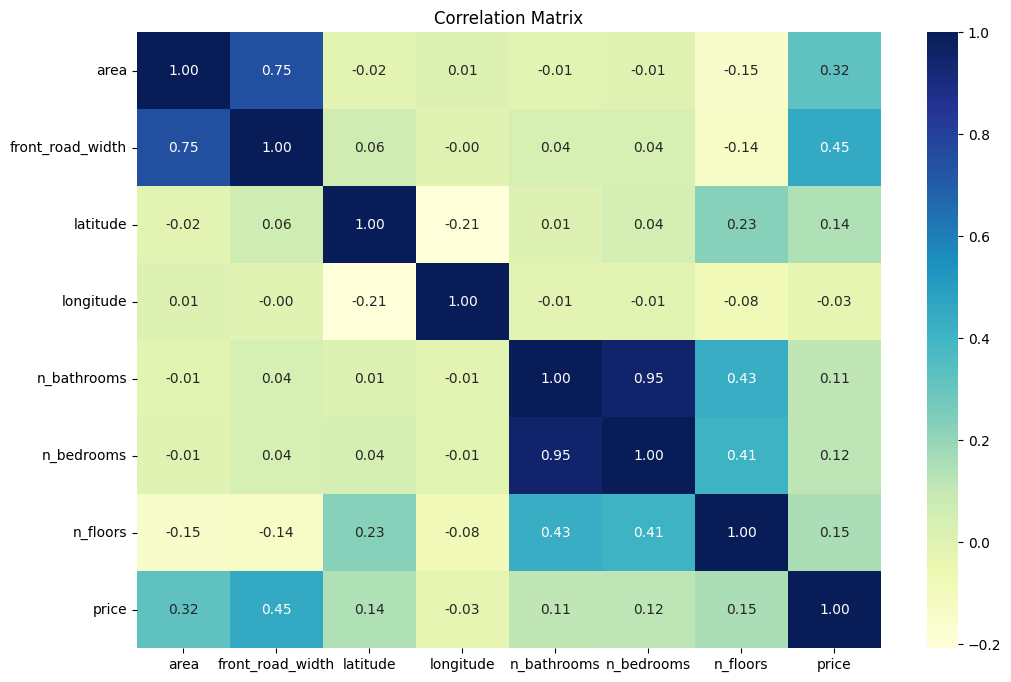

In [74]:
# Correlation matrix

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This chart presents the correlation coefficients between various features, helping to identify relationships in the dataset. Here's the specific analysis:

1. **Strong Correlations**
    1. **n_bathrooms** and **n_bedrooms**:
    - Correlation: **0.95**
    - These features are almost perfectly correlated, indicating that properties with more bedrooms tend to have more bathrooms.

    2. **area** and **front_road_width**:
    - Correlation: **0.75**
    - This strong relationship suggests that larger properties are often located on wider roads, which may reflect planning or zoning patterns.

2. **Moderate Correlations**
    1. **price** and **front_road_width**:
    - Correlation: **0.45**
    - Properties facing wider roads tend to have higher prices, possibly due to better accessibility or commercial potential.
    
    2. **price** and **area**:
    - Correlation: **0.32**
    - Larger properties generally have higher prices, although the relationship is moderate rather than strong.

    3. **n_floors** and **n_bathrooms / n_bedrooms**:
    - Correlation: **0.43** (with bathrooms) and **0.41** (with bedrooms).
    - Taller buildings tend to have more rooms and bathrooms.

3. **Weak or Negligible Correlations**
    1. **latitude** and **longitude** with most features:
    - Correlation values are generally low (mostly below **0.2**), indicating weak linear relationships with other attributes and price.

    2. **price** with **n_bathrooms**, **n_bedrooms**, and **n_floors**:
    - Correlation values are relatively weak (**~0.11–0.15**), suggesting these features alone do not strongly determine price.

#### **Key Observations**
- **Price Influencers**: Road width and area show stronger relationships with price compared to room-related features.
- **Interdependent Features**: Bedrooms and bathrooms are highly correlated and may introduce redundancy in predictive models.
- **Spatial Features**: Geographic coordinates exhibit minimal linear correlation with price, implying location effects may be non-linear or city-specific.

## **Single Categorical Feature Analysis**

In [86]:
# Value counts for each column
for column in ['city_province', 'property_type']:
    print(f"Value counts for column '{column}': {df[column].count()}")

Value counts for column 'city_province': 13827
Value counts for column 'property_type': 13828


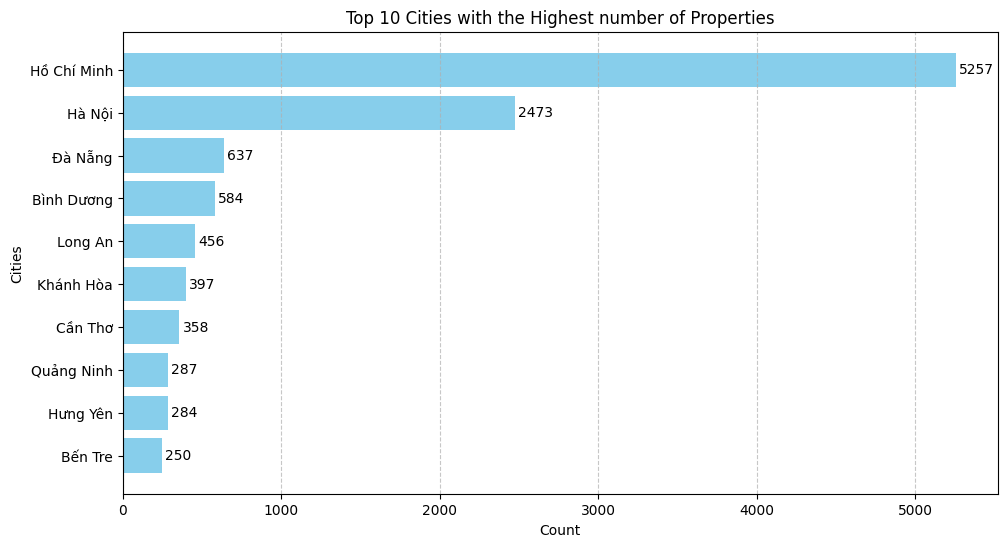

In [80]:
def normalize_city(x):
    if pd.isna(x):
        return x
    x = x.strip().lower()

    if x in ["tp.hcm", "tphcm", "tp hcm", "ho chi minh", "hồ chí minh"]:
        return "Hồ Chí Minh"
    if x in ["ha noi", "hà nội"]:
        return "Hà Nội"

    # Viết hoa chữ cái đầu mỗi từ cho các tỉnh khác
    return x.title()

df["city_province_norm"] = df["city_province"].apply(normalize_city)

filtered_city_counts = df['city_province_norm'].dropna()
filtered_city_counts = filtered_city_counts[filtered_city_counts != 'Not defined']

city_counts = filtered_city_counts.value_counts()
top_10_cities = city_counts.nlargest(10)
top_10_cities_sorted = top_10_cities.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_cities_sorted.index.str.title(), top_10_cities_sorted.values, color='skyblue')

for bar in bars:
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10)

plt.subplots_adjust(right=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Top 10 Cities with the Highest number of Properties')
plt.xlabel('Count')
plt.ylabel('Cities')

plt.show()


The chart shows the top 10 cities in Vietnam with the highest number of properties. Ho Chi Minh City and Ha Noi dominate with significantly higher counts, at 5,257 and 2,473 respectively, making up the majority of the data. Other cities like Da Nang, Binh Duong, and Long An have considerably fewer houses, ranging from 456 to 637, highlighting a stark contrast between the two major cities and the rest.

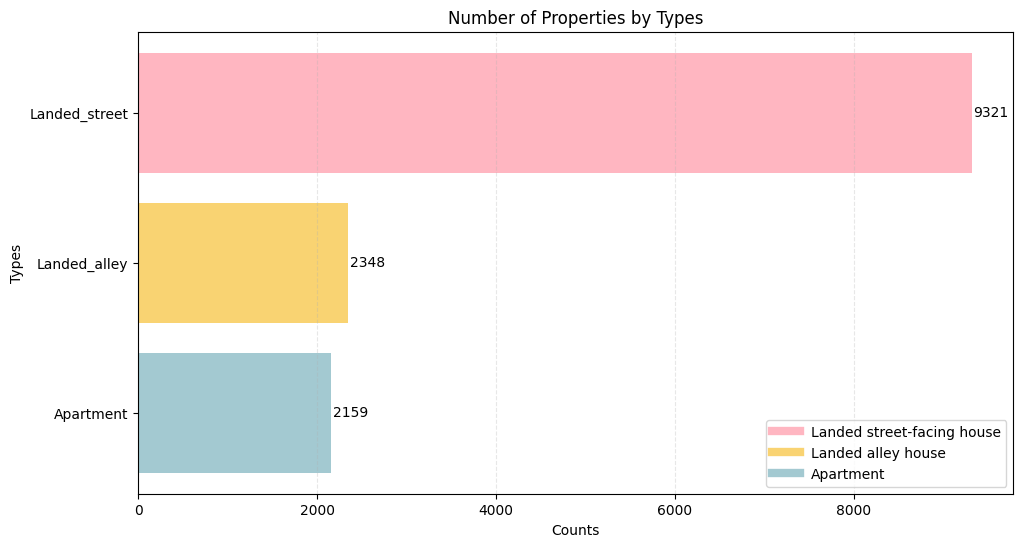

In [84]:
# Number of houses by each Type

type_counts = df['property_group'].value_counts()

ordered_types = ['Apartment', 'Landed_alley', 'Landed_street']
type_counts = type_counts[ordered_types]

color_map = {
    'Landed_street': '#ffb6c1',
    'Apartment': '#a3c9d1',
    'Landed_alley': '#f9d372'
}

colors = [color_map.get(x, 'gray') for x in type_counts.index]

plt.figure(figsize=(10, 6))
bars = plt.barh(type_counts.index, type_counts.values, color=colors)

plt.title('Number of Properties by Types')
plt.xlabel('Counts')
plt.ylabel('Types')

legend_labels = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

for bar in bars:
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.subplots_adjust(right=1)

handles = [plt.Line2D([0], [0], color=color_map[key], lw=6, label=legend_labels[key]) for key in ['Landed_street', 'Landed_alley', 'Apartment']]
plt.legend(handles=handles)

plt.show()

The chart categorizes properties into three types: "Landed street-facing house", "Landed alley house" and "Apartment". "Houses" dominates with 9,321 listings, followed by "Apartments" at 2,348, and "Land" at 2,159. This distribution shows that "Landed street-facing house" are the most prevalent property type, making up the majority of the data.

## **Multiple Categorical Feature Analysis**

### The Relationship Between `property_type` and `Other Features`

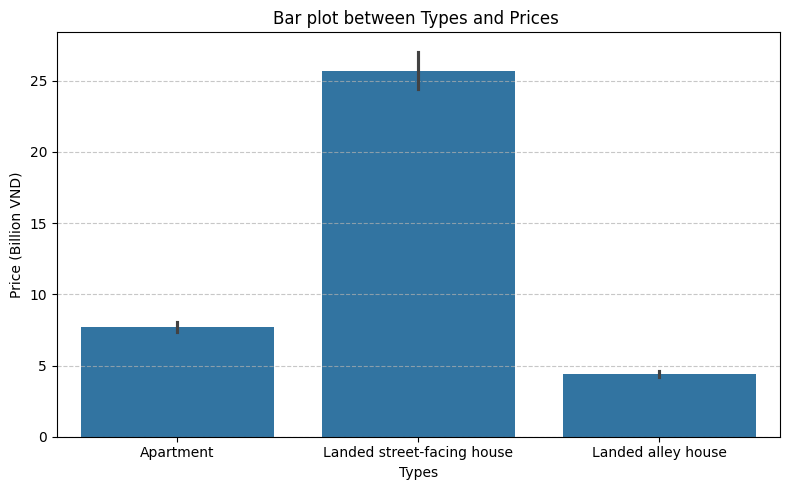

In [89]:
# Bar plot between types and prices

type_mapping = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

plt.figure(figsize=(8, 5))
sns.barplot(x='property_group', y='price', data=df)

xticks_labels = df['property_group'].dropna().unique()
mapped_labels = [type_mapping.get(label, label) for label in xticks_labels]

plt.xticks(ticks=range(len(mapped_labels)), labels=mapped_labels, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Bar plot between Types and Prices ")
plt.xlabel("Types")
plt.ylabel("Price (Billion VND)")

plt.tight_layout()
plt.show()


The bar plot illustrates the relationship between property types and their corresponding average prices in billion Vietnamese Dong (VND). It is evident that **Landed street-facing houses** have the highest average price (around **26 billion VND**), followed by **Apartments** at approximately **7–8 billion VND**, while **Landed alley houses** exhibit the lowest average price, at roughly **4–5 billion VND**.

**Key Insights**
1. **Market Implications**:
   - **Landed street-facing houses** represent a premium segment, likely driven by better accessibility and commercial potential.
   - **Apartments** fall into a mid-price range, appealing to urban residents seeking convenience at a more affordable price point.
   - **Landed alley houses** are the most budget-friendly category, reflecting limited accessibility and lower commercial value.

2. **Feature Engineering Suggestions**:
   - **Property type** should be treated as an important categorical feature to capture the substantial price differences across segments.
   - For **landed street-facing houses**, additional features such as street width or location may help explain the higher price variability.

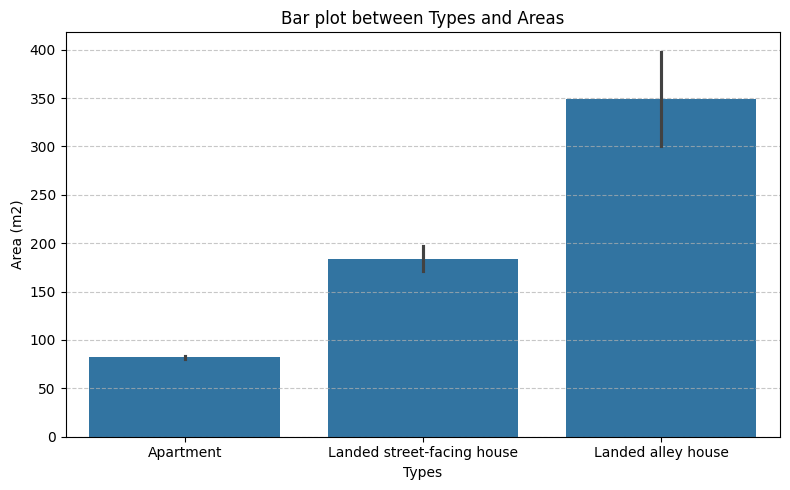

In [88]:
# Bar plot between types and areas

type_mapping = {
    'Apartment': 'Apartment',
    'Landed_alley': 'Landed alley house',
    'Landed_street': 'Landed street-facing house'
}

plt.figure(figsize=(8, 5))
sns.barplot(x='property_group', y='area', data=df)

xticks_labels = df['property_group'].dropna().unique()
mapped_labels = [type_mapping.get(label, label) for label in xticks_labels]

plt.xticks(ticks=range(len(mapped_labels)), labels=mapped_labels, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Bar plot between Types and Areas")
plt.xlabel("Types")
plt.ylabel("Area (m2)")

plt.tight_layout()
plt.show()


The bar plot illustrates the relationship between property types and their corresponding average areas (in square meters). It is evident that **Landed alley houses** have the largest average area (around **350 m²**), followed by **Landed street-facing houses** (approximately **180 m²**), while **Apartments** exhibit the smallest average area, at roughly **80 m²**.

**Key Insights**

1. **Market Segmentation**:
   - **Landed alley houses** tend to offer significantly larger living spaces, likely catering to buyers seeking spacious residential properties in less commercialized locations.
   - **Landed street-facing houses** occupy a mid-range in terms of area, balancing accessibility and usable space.
   - **Apartments** are designed for compact urban living, targeting residents prioritizing location and convenience over space.

2. **Feature Correlation**:
   - Property type shows a strong association with area size, indicating that **area is a highly discriminative feature across property categories** and is likely to play an important role in price prediction and market segmentation.

### The Relationship Between `city_province` and `Other Features`

/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/1639250426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


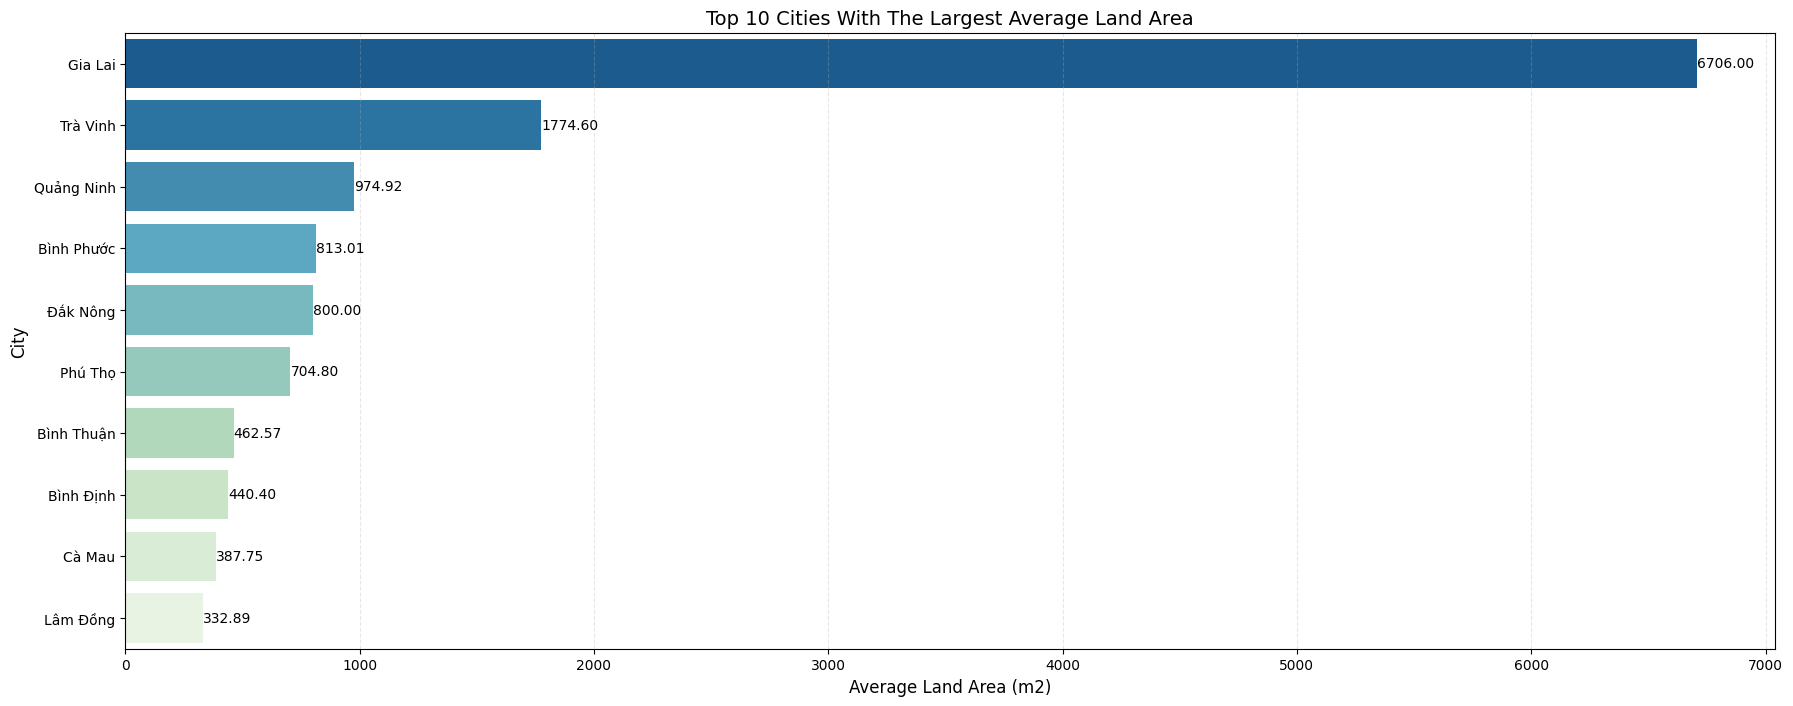

In [91]:
# Filter Top 10 Cities With The Largest Average Land Area
top_10_cities = df[['city_province', 'area']].groupby('city_province').mean().nlargest(10, 'area').reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_cities,
    x='area',
    y=top_10_cities['city_province'].str.title(),
    palette='GnBu_r'
)

# Add values to the end of each bar
for index, value in enumerate(top_10_cities['area']):
    plt.text(
        value + 0.5,
        index,
        f'{value:.2f}',
        va='center',
        fontsize=10
    )

plt.subplots_adjust(right=1.5)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.title("Top 10 Cities With The Largest Average Land Area", fontsize=14)
plt.xlabel("Average Land Area (m2)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()


The chart highlights the top 10 cities with the largest average land area (in square meters). **Gia Lai** leads by a large margin with an average land area of approximately **6,706 m²**, followed by **Trà Vinh** (**1,774.60 m²**) and **Quảng Ninh** (**974.92 m²**). The substantially larger land areas in these provinces likely reflect their rural or semi-rural characteristics, where land is more abundant and properties tend to occupy larger plots.

Provinces such as **Bình Phước**, **Đắk Nông**, and **Phú Thọ** also exhibit relatively large average land areas, indicating lower population density and less intensive land subdivision. In contrast, provinces like **Bình Thuận**, **Bình Định**, **Cà Mau**, and **Lâm Đồng** appear lower in the ranking, which may be attributed to more fragmented land use, geographic constraints, or higher levels of residential and agricultural land division.

/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/2090535187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/2090535187.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/2090535187.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


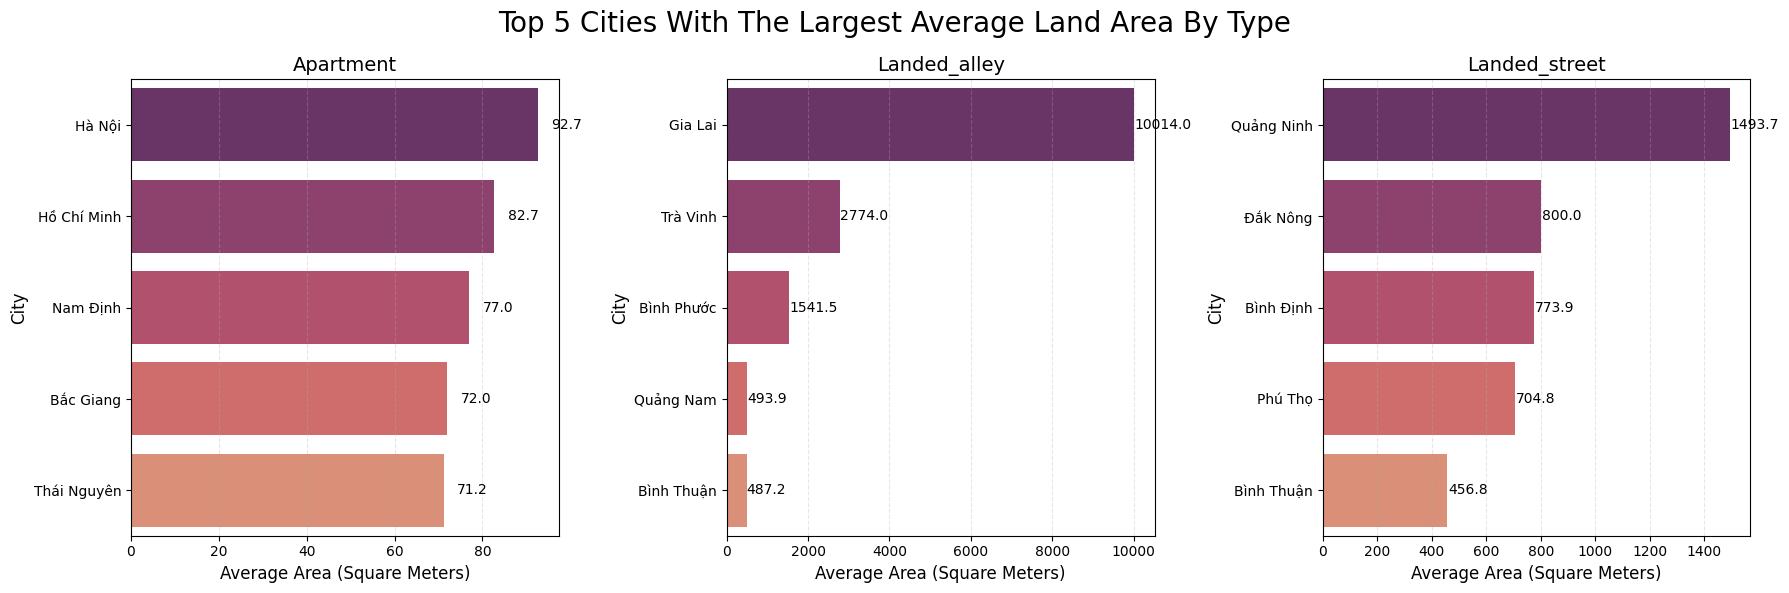

In [93]:
# Filter data for each type and get top 5 cities with the largest average land area for each type
top_5_cc = df[df['property_group'] == 'Apartment'][['city_province', 'area']].groupby('city_province').mean().nlargest(5, 'area').reset_index()
top_5_n = df[df['property_group'] == 'Landed_alley'][['city_province', 'area']].groupby('city_province').mean().nlargest(5, 'area').reset_index()
top_5_d = df[df['property_group'] == 'Landed_street'][['city_province', 'area']].groupby('city_province').mean().nlargest(5, 'area').reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Apartment
sns.barplot(
    data=top_5_cc,
    x='area',
    y=top_5_cc['city_province'].str.title(),
    palette='flare_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Landed_alley
sns.barplot(
    data=top_5_n,
    x='area',
    y=top_5_n['city_province'].str.title(),
    palette='flare_r',
    ax=axes[1]
)
axes[1].set_title('Landed_alley', fontsize=14)
axes[1].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Landed_street
sns.barplot(
    data=top_5_d,
    x='area',
    y=top_5_d['city_province'].str.title(),
    palette='flare_r',
    ax=axes[2]
)
axes[2].set_title('Landed_street', fontsize=14)
axes[2].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[2].set_ylabel('City', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels to each bar
for ax, top_5_data in zip(axes, [top_5_cc, top_5_n, top_5_d]):
    for index, value in enumerate(top_5_data['area']):
        ax.text(
            value + 3,
            index,
            f'{value:.1f}',
            va='center',
            fontsize=10
        )

fig.suptitle('Top 5 Cities With The Largest Average Land Area By Type', fontsize=20)
plt.tight_layout()
plt.show()


This chart illustrates the **Top 5 Cities with the Largest Average Land Area**, segmented by property type: **Apartment**, **Landed alley house**, and **Landed street-facing house**.

1. **Apartments**
   - **Hà Nội (92.7 m²)** has the largest average apartment size, followed by **Hồ Chí Minh (82.7 m²)** and **Nam Định (77.0 m²)**.
   - The differences among cities are relatively small, reflecting standardized apartment designs in urban and peri-urban areas.
   - **Bắc Giang (72.0 m²)** and **Thái Nguyên (71.2 m²)** complete the top five, showing comparable apartment development patterns.

2. **Landed Alley Houses**
   - **Gia Lai (10,014.0 m²)** stands out as a strong outlier with an exceptionally large average house area, indicating rural or very low-density housing characteristics.
   - **Trà Vinh (2,774.0 m²)** and **Bình Phước (1,541.5 m²)** follow, suggesting spacious residential plots typical of non-urban regions.
   - **Quảng Nam (493.9 m²)** and **Bình Thuận (487.2 m²)** have significantly smaller averages, reflecting more fragmented land use.

3. **Landed Street-facing Houses**
   - **Quảng Ninh (1,493.7 m²)** leads this category, indicating large street-facing residential plots.
   - **Đắk Nông (800.0 m²)** and **Bình Định (773.9 m²)** rank next, with moderately large average areas.
   - **Phú Thọ (704.8 m²)** and **Bình Thuận (456.8 m²)** round out the top five.

**Cross-chart Observations**
- **Urban vs. Rural Contrast**:
   - Apartment sizes remain relatively consistent across cities, especially in urbanized areas.
   - Landed properties, particularly alley houses, show extreme variation, driven by regional land availability and population density.
- **Development Patterns**:
   - Urban centers (e.g Hà Nội, Hồ Chí Minh) prioritize space efficiency for apartments.
   - Rural and semi-rural provinces exhibit significantly larger plots for landed properties, highlighting distinct development priorities.

/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/850130945.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/850130945.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/850130945.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


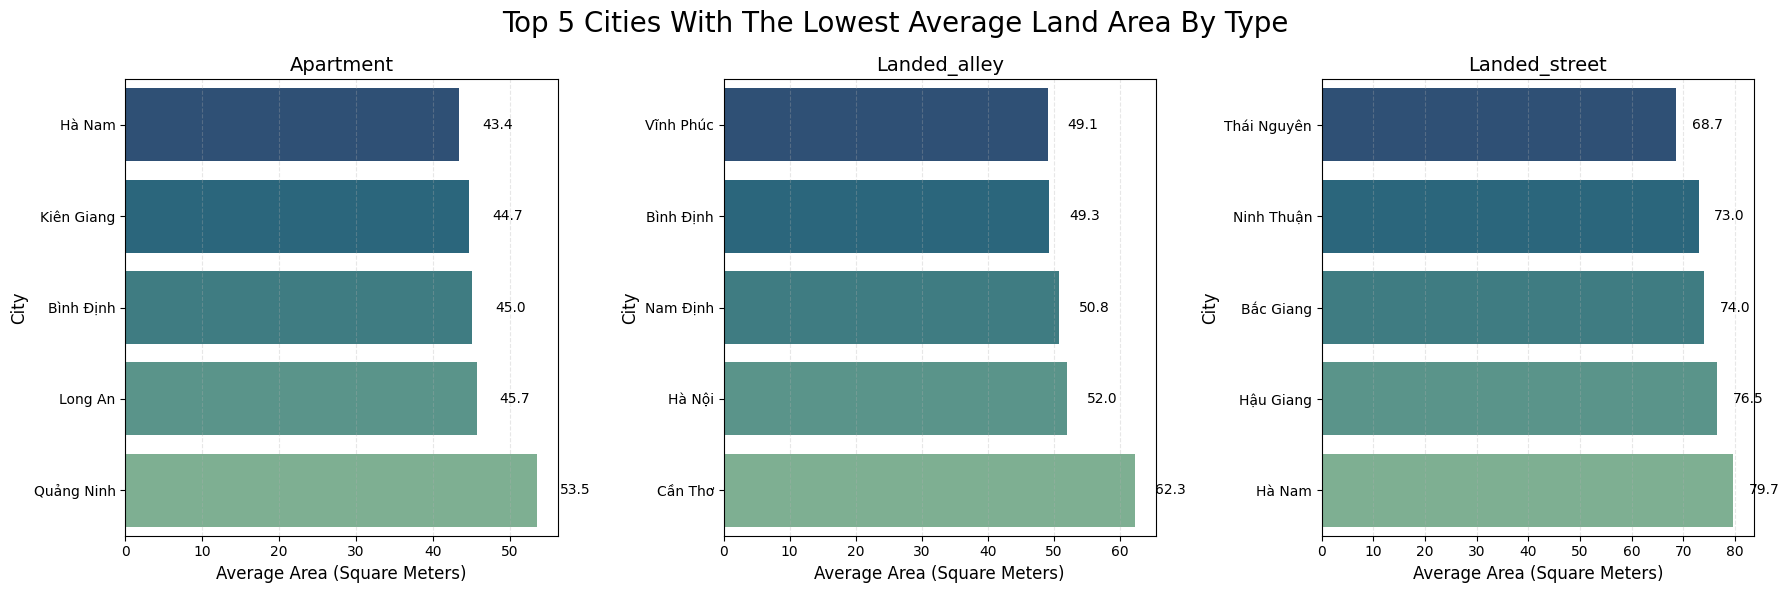

In [94]:
# Filter data for each type and get top 5 cities with the lowest average land area for each type
top_5_cc = df[df['property_group'] == 'Apartment'][['city_province', 'area']].groupby('city_province').mean().nsmallest(5, 'area').reset_index()
top_5_n = df[df['property_group'] == 'Landed_alley'][['city_province', 'area']].groupby('city_province').mean().nsmallest(5, 'area').reset_index()
top_5_d = df[df['property_group'] == 'Landed_street'][['city_province', 'area']].groupby('city_province').mean().nsmallest(5, 'area').reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Apartment
sns.barplot(
    data=top_5_cc,
    x='area',
    y=top_5_cc['city_province'].str.title(),
    palette='crest_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for House
sns.barplot(
    data=top_5_n,
    x='area',
    y=top_5_n['city_province'].str.title(),
    palette='crest_r',
    ax=axes[1]
)
axes[1].set_title('Landed_alley', fontsize=14)
axes[1].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Land
sns.barplot(
    data=top_5_d,
    x='area',
    y=top_5_d['city_province'].str.title(),
    palette='crest_r',
    ax=axes[2]
)
axes[2].set_title('Landed_street', fontsize=14)
axes[2].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[2].set_ylabel('City', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels to each bar
for ax, top_5_data in zip(axes, [top_5_cc, top_5_n, top_5_d]):
    for index, value in enumerate(top_5_data['area']):
        ax.text(
            value + 3,
            index,
            f'{value:.1f}',
            va='center',
            fontsize=10
        )

fig.suptitle('Top 5 Cities With The Lowest Average Land Area By Type', fontsize=20)
plt.tight_layout()
plt.show()


The chart displays **The Top 5 Cities With The Lowest Average Land Area** for three property types: **Apartment**, **Landed alley house**, and **Landed street-facing house**.

**1. Apartments**
- **Hà Nam (43.4 m²)** has the smallest average apartment area, followed by **Kiên Giang (44.7 m²)**, **Bình Định (45.0 m²)**, **Long An (45.7 m²)**, and **Quảng Ninh (53.5 m²)**.
- All cities in this group have average apartment sizes below **55 m²**, indicating compact apartment layouts, likely driven by urban density or affordability-focused housing development.

**2. Landed Alley Houses**
- **Vĩnh Phúc (49.1 m²)** records the smallest average area for landed alley houses, closely followed by **Bình Định (49.3 m²)** and **Nam Định (50.8 m²)**.
- **Hà Nội (52.0 m²)** and **Cần Thơ (62.3 m²)** complete the list, showing slightly larger but still relatively modest house sizes.
- Compared to apartments, landed alley houses offer marginally more space, yet remain constrained due to narrow access and dense residential layouts.

**3. Landed Street-facing Houses**
- **Thái Nguyên (68.7 m²)** has the smallest average street-facing house area, followed by **Ninh Thuận (73.0 m²)**, **Bắc Giang (74.0 m²)**, **Hậu Giang (76.5 m²)**, and **Hà Nam (79.7 m²)**.
- Although larger than apartments and alley houses, these areas are still relatively small for street-facing properties, suggesting urban or semi-urban development patterns.

**Cross-chart Observations**
1. **Compact Urban Development**:
   - Smaller average areas across all property types indicate high land-use intensity and limited space availability in these cities.
   - Apartments consistently show the smallest sizes, reinforcing their role as space-efficient housing options.

2. **Consistent Urban Constraints**:
   - Cities such as **Hà Nam** and **Bình Định** appear across multiple categories, highlighting consistent spatial constraints regardless of property type.

3. **Variation by Property Type**:
   - Apartments exhibit the narrowest range of areas.
   - Landed houses, especially street-facing ones, show slightly larger but still constrained plot sizes compared to alley houses.

/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/2645626281.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/2645626281.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/2645626281.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


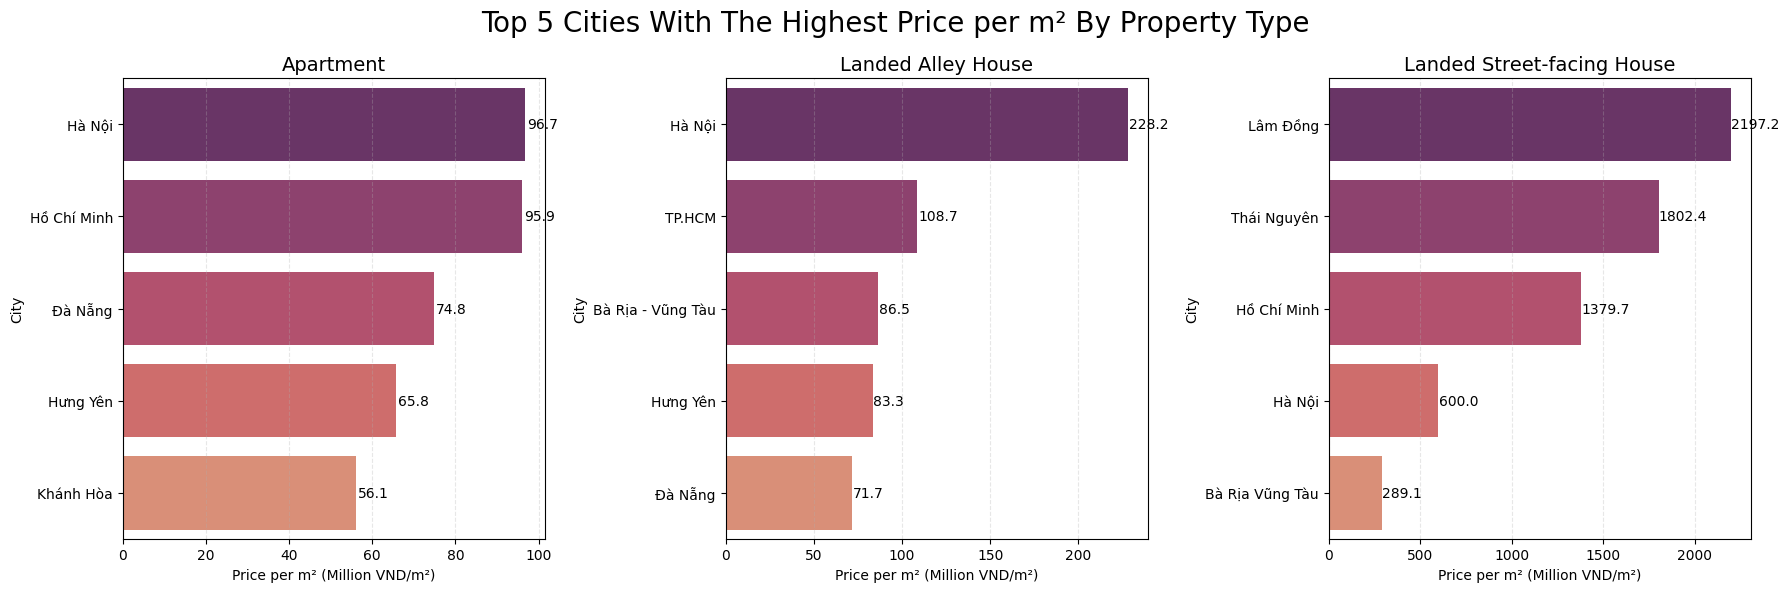

In [95]:
# Calculate price per square meter (Million VND / m²)
df['price_per_m2'] = (df['price'] * 1000) / df['area']

# Top 5 cities with highest price per m² for each property group
top_5_apartment = (
    df[df['property_group'] == 'Apartment']
    .groupby('city_province')['price_per_m2']
    .mean()
    .nlargest(5)
    .reset_index()
)

top_5_landed_alley = (
    df[df['property_group'] == 'Landed_alley']
    .groupby('city_province')['price_per_m2']
    .mean()
    .nlargest(5)
    .reset_index()
)

top_5_landed_street = (
    df[df['property_group'] == 'Landed_street']
    .groupby('city_province')['price_per_m2']
    .mean()
    .nlargest(5)
    .reset_index()
)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Apartment
sns.barplot(
    data=top_5_apartment,
    x='price_per_m2',
    y='city_province',
    palette='flare_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Price per m² (Million VND/m²)')
axes[0].set_ylabel('City')
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Landed alley
sns.barplot(
    data=top_5_landed_alley,
    x='price_per_m2',
    y='city_province',
    palette='flare_r',
    ax=axes[1]
)
axes[1].set_title('Landed Alley House', fontsize=14)
axes[1].set_xlabel('Price per m² (Million VND/m²)')
axes[1].set_ylabel('City')
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Landed street
sns.barplot(
    data=top_5_landed_street,
    x='price_per_m2',
    y='city_province',
    palette='flare_r',
    ax=axes[2]
)
axes[2].set_title('Landed Street-facing House', fontsize=14)
axes[2].set_xlabel('Price per m² (Million VND/m²)')
axes[2].set_ylabel('City')
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels
for ax, data in zip(
    axes,
    [top_5_apartment, top_5_landed_alley, top_5_landed_street]
):
    for i, v in enumerate(data['price_per_m2']):
        ax.text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=10)

fig.suptitle(
    'Top 5 Cities With The Highest Price per m² By Property Type',
    fontsize=20
)

plt.tight_layout()
plt.show()

The chart presents the **Top 5 Cities with the Highest Price per m²** categorized by property types: **Apartment**, **Landed Alley House**, and **Landed Street-facing House**, with prices measured in **million VND per m²**.

**1. Apartments**
- **Hà Nội** leads with the highest price per m² at **96.7 million VND**, closely followed by **Hồ Chí Minh** (**95.9 million VND**) and **Đà Nẵng** (**74.8 million VND**).
- **Hưng Yên** and **Khánh Hòa** have lower but significant prices, at **65.8 million VND** and **56.1 million VND** respectively.
- **Key Insight**: The dominance of Hà Nội and Hồ Chí Minh reflects strong demand in major cities, while the remaining cities indicate smaller but still active apartment markets.

**2. Landed Alley House**
- **Hà Nội** significantly outpaces all other cities with a price of **228.2 million VND per m²**, making it the standout in this category.
- Other high-price locations include **TP.HCM** (**108.7 million VND**) and **Bà Rịa - Vũng Tàu** (**86.5 million VND**), with **Hưng Yên** (**83.3 million VND**) and **Đà Nẵng** (**71.7 million VND**) following.
- **Key Insight**: The large gap between Hà Nội and the rest suggests either premium alley-house segments in Hà Nội or potential data skew (e.g., small area listings driving price/m² up).

**3. Landed Street-facing House**
- **Lâm Đồng** dominates with the highest price per m² at **2197.2 million VND**, followed by **Thái Nguyên** (**1802.4 million VND**) and **Hồ Chí Minh** (**1379.7 million VND**).
- **Hà Nội** (**600.0 million VND**) and **Bà Rịa Vũng Tàu** (**289.1 million VND**) complete the list.
- **Key Insight**: The extremely high values here strongly indicate outliers or inconsistencies (commonly caused by very small reported area, abnormal prices, or unit issues), so this group should be checked before modeling.

**Cross-chart Observations**
1. **Regional Dominance**: Hà Nội and Hồ Chí Minh remain prominent across categories, reflecting high demand in key markets.
2. **Outliers**: Landed street-facing houses show unusually large price/m² values (e.g., Lâm Đồng, Thái Nguyên), suggesting potential outliers or data quality issues.
3. **Label Consistency**: The appearance of both **TP.HCM** and **Hồ Chí Minh** implies city labels are not fully standardized and should be unified before final reporting.
4. **Property Types**: Apartments show more reasonable and clustered price/m² values, while landed categories—especially street-facing—are more sensitive to outliers.

/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/689234836.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/689234836.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_g/m702v01556n6m67l73_xy_wm0000gn/T/ipykernel_37228/689234836.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


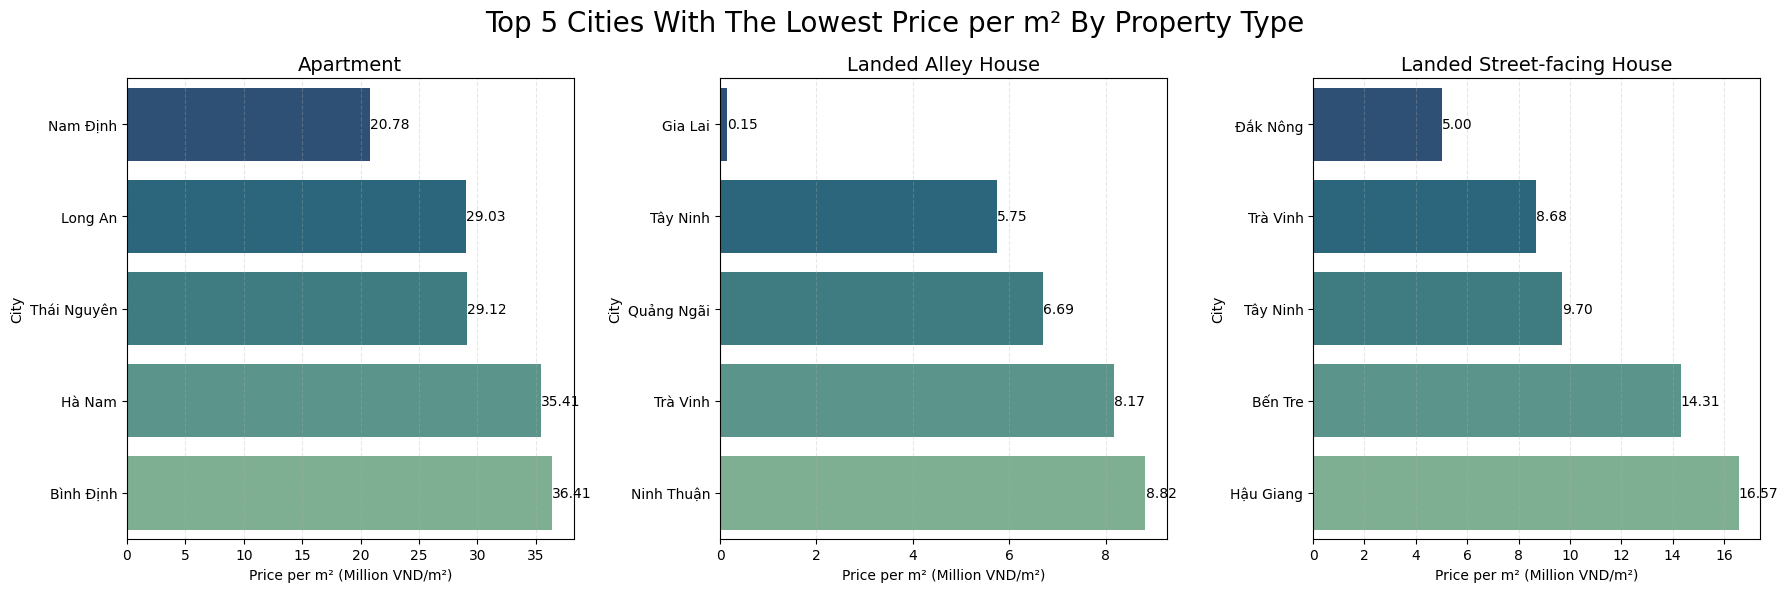

In [98]:
df = df[~((df['property_group'] == 'Landed_street') &
          (df['city_province'].str.lower() == 'thái nguyên'))]

# Calculate price per square meter
df['price/m²'] = (df['price'] * 1000) / df['area']

# Filter and calculate the top 5 cities with the lowest price per m² for each type
top_5_apartment = (
    df[df['property_group'] == 'Apartment']
    [['city_province', 'price/m²']]
    .groupby('city_province')
    .mean()
    .nsmallest(5, 'price/m²')
    .reset_index()
)

top_5_alley = (
    df[df['property_group'] == 'Landed_alley']
    [['city_province', 'price/m²']]
    .groupby('city_province')
    .mean()
    .nsmallest(5, 'price/m²')
    .reset_index()
)

top_5_street = (
    df[df['property_group'] == 'Landed_street']
    [['city_province', 'price/m²']]
    .groupby('city_province')
    .mean()
    .nsmallest(5, 'price/m²')
    .reset_index()
)

# Plotting section
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Apartment
sns.barplot(
    data=top_5_apartment,
    x='price/m²',
    y=top_5_apartment['city_province'].str.title(),
    palette='crest_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Price per m² (Million VND/m²)')
axes[0].set_ylabel('City')
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Landed alley house
sns.barplot(
    data=top_5_alley,
    x='price/m²',
    y=top_5_alley['city_province'].str.title(),
    palette='crest_r',
    ax=axes[1]
)
axes[1].set_title('Landed Alley House', fontsize=14)
axes[1].set_xlabel('Price per m² (Million VND/m²)')
axes[1].set_ylabel('City')
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Landed street-facing house
sns.barplot(
    data=top_5_street,
    x='price/m²',
    y=top_5_street['city_province'].str.title(),
    palette='crest_r',
    ax=axes[2]
)
axes[2].set_title('Landed Street-facing House', fontsize=14)
axes[2].set_xlabel('Price per m² (Million VND/m²)')
axes[2].set_ylabel('City')
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels
for ax, data in zip(axes, [top_5_apartment, top_5_alley, top_5_street]):
    for i, v in enumerate(data['price/m²']):
        ax.text(v + 0.001, i, f'{v:.2f}', va='center', fontsize=10)

fig.suptitle('Top 5 Cities With The Lowest Price per m² By Property Type', fontsize=20)
plt.tight_layout()
plt.show()

The chart depicts the **Top 5 Cities with the Lowest Price per m²**, categorized by property types: **Apartment**, **Landed Alley House**, and **Landed Street-facing House**, with prices expressed in **million VND per m²**.

**1. Apartments**
- **Nam Định** has the lowest price at **20.78 million VND per m²**, followed by **Long An** (29.03 million VND) and **Thái Nguyên** (29.12 million VND).
- **Hà Nam** (35.41 million VND) and **Bình Định** (36.41 million VND) complete the list.
- **Key Insight**: These cities exhibit relatively affordable apartment markets, reflecting lower demand compared to major metropolitan areas.

**2. Houses (Landed Alley House)**
- **Gia Lai** records the lowest price at **0.15 million VND per m²**, standing out significantly from other cities.
- Other low-price cities include **Tây Ninh** (5.75 million VND), **Quảng Ngãi** (6.69 million VND), **Trà Vinh** (8.17 million VND), and **Ninh Thuận** (8.82 million VND).
- **Key Insight**: The extremely low value in Gia Lai may indicate rural properties, very large land plots, or potential data anomalies.

**3. Land (Landed Street-facing House)**
- **Đắk Nông** has the lowest price at **5.00 million VND per m²**, followed by **Trà Vinh** (8.68 million VND) and **Tây Ninh** (9.70 million VND).
- **Bến Tre** (14.31 million VND) and **Hậu Giang** (16.57 million VND) round out the list.
- **Key Insight**: These regions represent more affordable street-facing land markets, typically associated with lower urban density and weaker commercial pressure.

**Cross-chart Observations**
1. **Affordable Regions**: All three property types highlight cities outside major economic hubs, consistent with lower land and housing demand.
2. **Extreme Outliers**: Landed alley houses show the lowest extremes, particularly in **Gia Lai**, warranting further inspection.
3. **Clear Type Differences**: Apartments maintain higher price floors, while landed properties—especially alley houses—can reach very low price levels.
4. **Data Validation Needed**: Extremely low price-per-m² values should be carefully checked to avoid skewing downstream analysis.

# **Outlier Handling**

## **Data Before Handling Outliers**

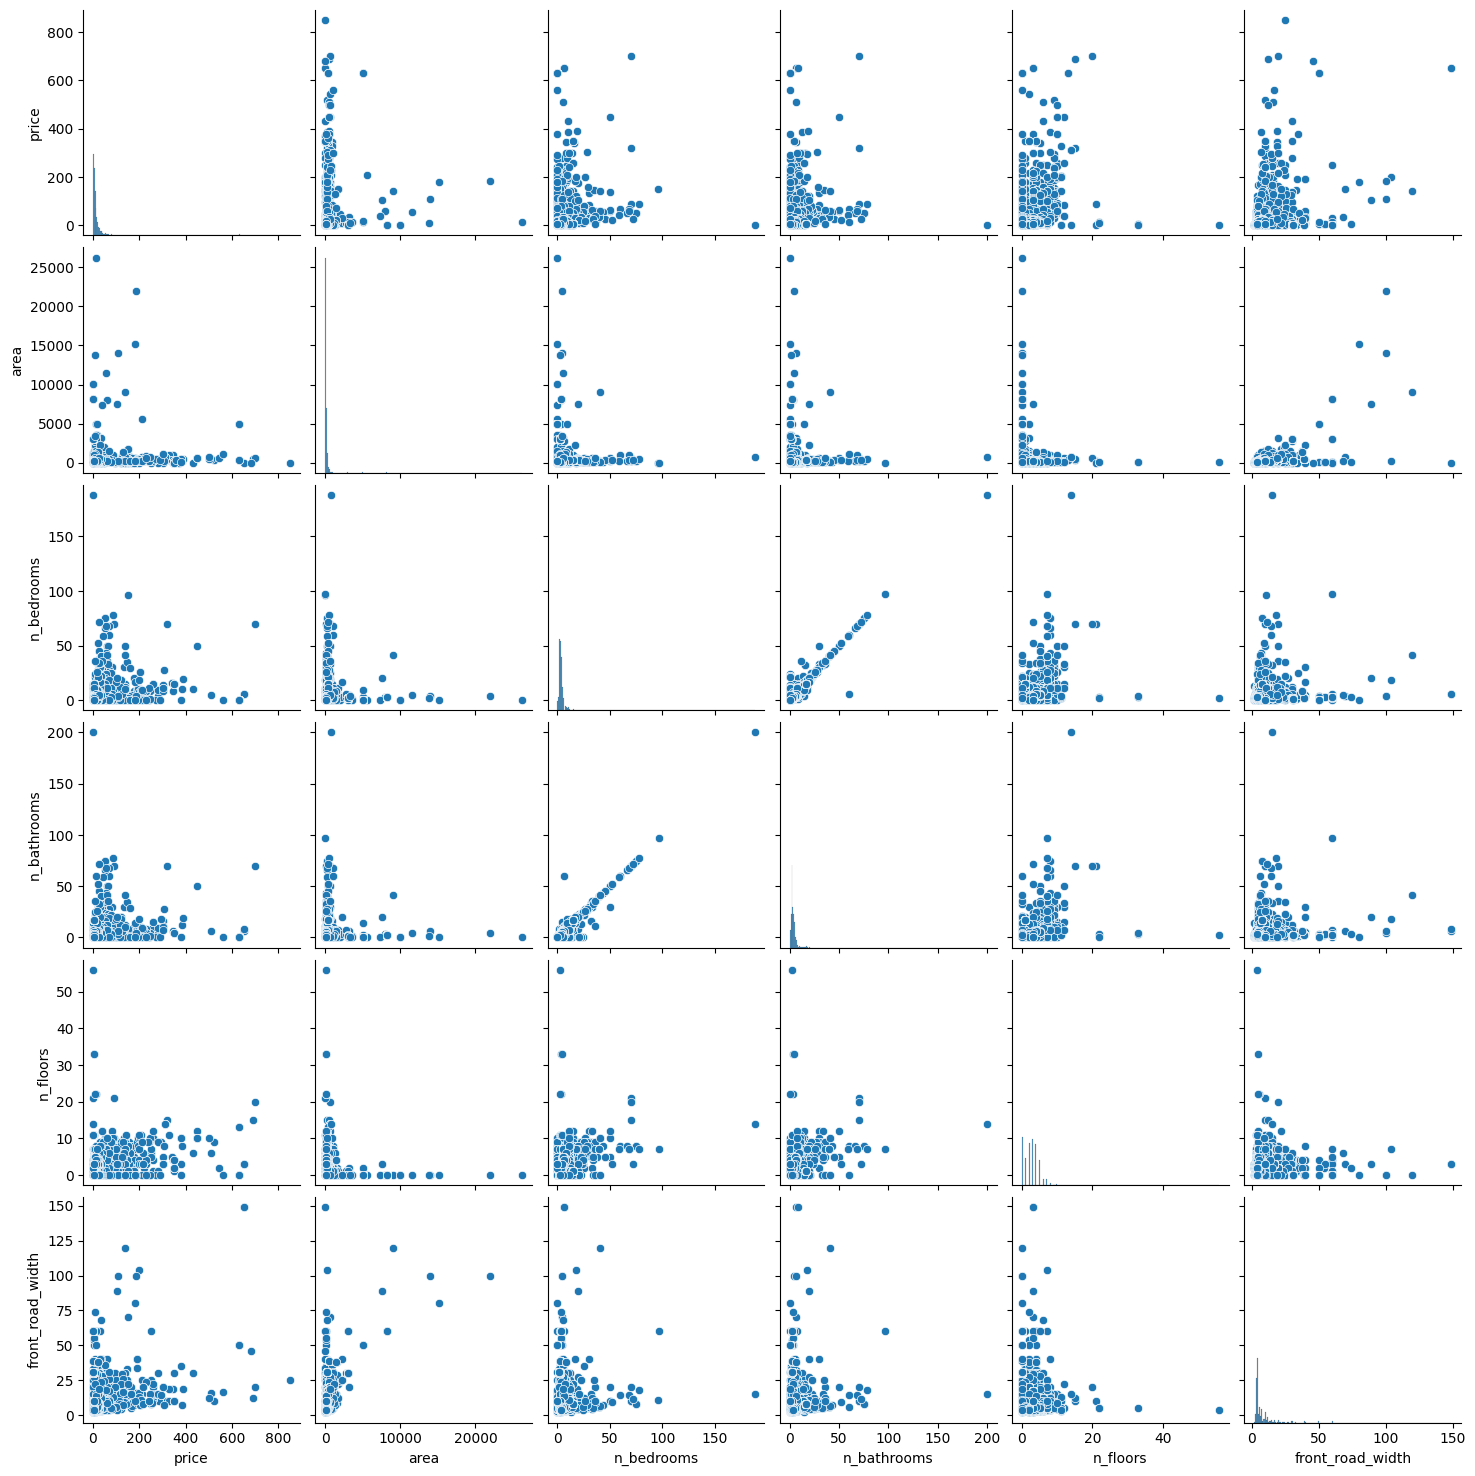

In [99]:
sns.pairplot(df[['price', 'area', 'n_bedrooms', 'n_bathrooms', 'n_floors', 'front_road_width']])
plt.show()

The chart is a pair plot, visualizing relationships between multiple numerical variables in the dataset. Each diagonal subplot represents the distribution of a single variable, while the off-diagonal subplots display scatter plots showing pairwise relationships.

1. **Price vs. Other Variables:**

   - The scatter plots show a **non-linear relationship** between `price` and `area`. In general, larger areas are associated with higher prices; however, there are several outliers with very high prices despite relatively small areas.
   - `n_bedrooms` and `n_bathrooms` exhibit a **weak-to-moderate positive association** with `price`. Properties with more rooms tend to be more expensive, though this pattern is not consistent due to the presence of outliers.

2. **Area vs. Other Variables:**

   - `area` shows a **strong positive relationship** with both `n_bedrooms` and `n_bathrooms`, indicating that larger properties usually contain more rooms and bathrooms.
   - The relationship between `area` and `n_floors` is less clear. Some properties with small areas still have multiple floors, suggesting vertical construction in dense urban settings.

3. **Relationships Among Bedrooms, Bathrooms, and Floors:**

   - `n_bedrooms` and `n_bathrooms` demonstrate a **near-linear correlation**, reflecting typical residential design patterns.
   - `n_floors` does not show a strong correlation with either `n_bedrooms` or `n_bathrooms`. Most properties have fewer than 10 floors, indicating a dominance of low-rise and mid-rise buildings.

4. **Weak Correlations:**
   - `front_road_width` exhibits little to no consistent correlation with most other numerical variables, including `price` and `area`, suggesting that road width alone does not strongly determine property scale or value.

5. **Outlier Detection**

   1. **Outliers in `price`:**
      - In the scatter plots between `price` and `area`, several observations display extremely high prices relative to their area. These likely represent luxury properties or properties in prime locations.
      - High-price outliers also appear for properties with a typical number of bedrooms or bathrooms, indicating that factors beyond structural attributes (e.g., location, legal status) may drive prices.

   2. **Outliers in `area`:**
      - The distribution of `area` is heavily right-skewed, with extreme values corresponding to very large land parcels or non-residential properties.
      - These large-area properties do not always scale proportionally with `price`, suggesting heterogeneous land use or potential underpricing.

   3. **Outliers in `front_road_width`:**
      - A small number of properties have exceptionally large `front_road_width` values, likely associated with locations near major roads or highways.
      - These extreme values do not consistently translate into higher prices, indicating a weak standalone effect.

   4. **Outliers in `n_floors`:**
      - Some properties exhibit unusually high floor counts, which are likely commercial buildings or mixed-use developments.
      - These observations show weak alignment with both `area` and `price`, reinforcing the need to treat them as a distinct segment.

   5. **Impact on Analysis:**
      - **Skewed Statistics:** Extreme values can disproportionately affect mean-based statistics.
      - **Market Segmentation:** Outliers may represent distinct market segments (e.g., luxury or commercial properties).
      - **Preprocessing Implications:** These observations justify the use of log transformations, grouping strategies, or robust modeling techniques rather than outright removal.

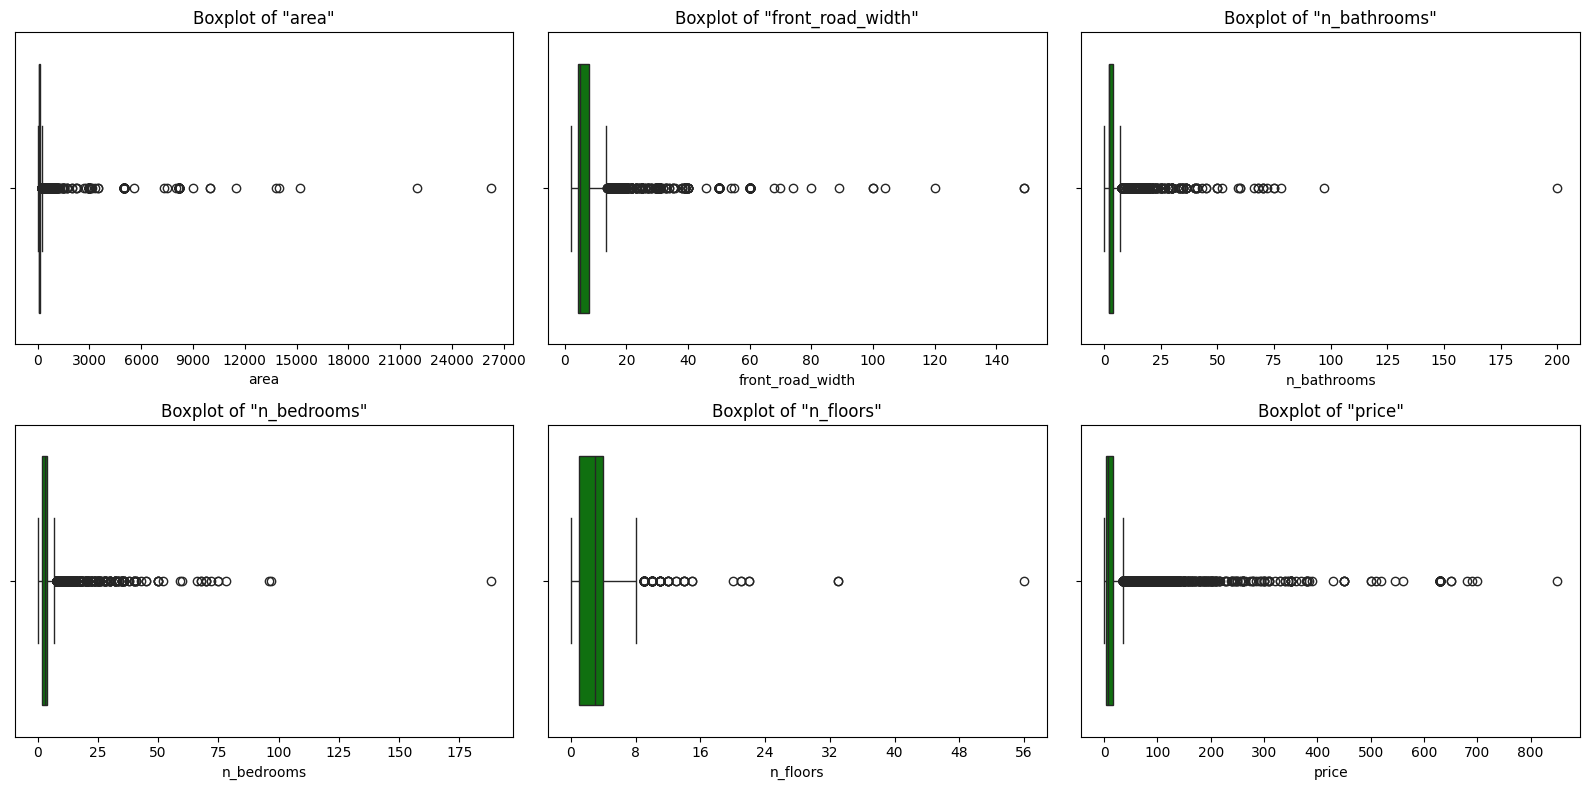

In [101]:
# Boxplot to detect outliers (exclude latitude & longitude)

exclude_cols = ['latitude', 'longitude']

numerical_cols = [
    col for col in df.select_dtypes(include=['float64', 'int64']).columns
    if col not in exclude_cols
]

num_cols = 6
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:num_cols]):
    sns.boxplot(x=df[col], color='green', ax=axes[i])
    axes[i].set_title(f'Boxplot of "{col}"')
    axes[i].set_xlabel(col)

    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## **Data After Handling Outliers**

In [117]:
df2 = df.copy()

df2["price/m2"] = (df2["price"] * 1000) / df2["area"]  

p = df2[[
    "price",
    "area",
    "front_road_width",
    "n_bedrooms",
    "n_bathrooms",
    "n_floors",
    "price/m2"
]].quantile(0.99)

drop_condition = (
    (df2["price"] < 0.5) |          
    (df2["area"] < 20) |            

    (df2["price"] > 220) |
    (df2["area"] > 3000) |
    (df2["front_road_width"] > 50) |
    (df2["n_bedrooms"] > 21) |
    (df2["n_bathrooms"] > 20) |
    (df2["n_floors"] > 8) |

    ((df2["n_bedrooms"] > 15) & (df2["area"] < 60)) |
    ((df2["n_bathrooms"] > 12) & (df2["area"] < 50)) |
    ((df2["n_floors"] > 6) & (df2["front_road_width"] < 3)) |

    (df2["price/m2"] < 5) |      
    (df2["price/m2"] > 2000)     
)

df_handled_outlier = df2[~drop_condition].copy()

print("Before:", df.shape[0])
print("After :", df_handled_outlier.shape[0])
print("Removed:", df.shape[0] - df_handled_outlier.shape[0])

Before: 13824
After : 13054
Removed: 770


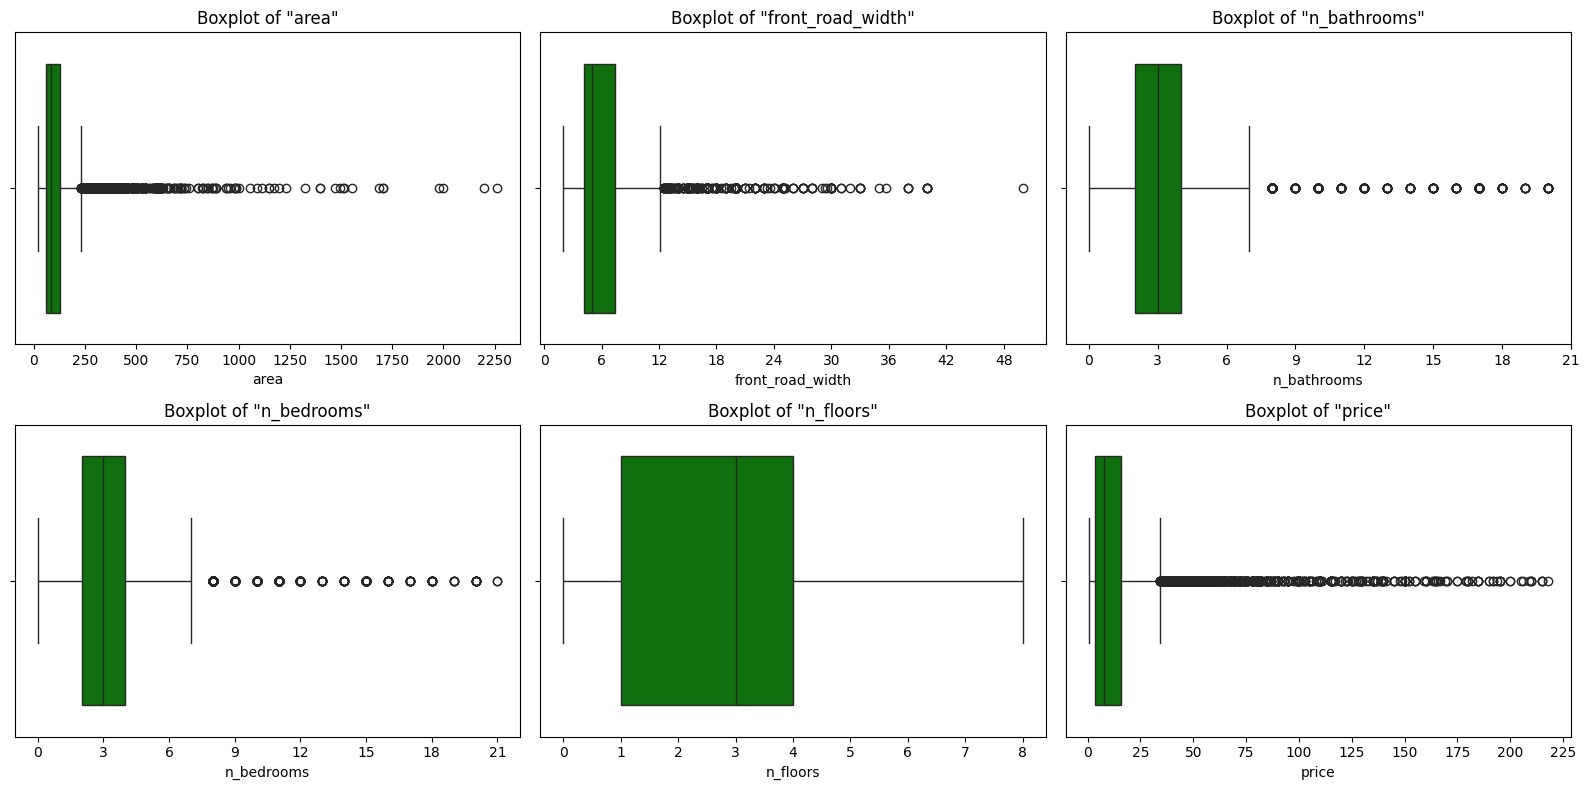

In [118]:
# Numerical Feature Analysis 
numerical_cols = (
    df_handled_outlier
    .select_dtypes(include=['float64', 'int64'])
    .columns
    .drop(['latitude', 'longitude'], errors='ignore')
)

num_cols = 6
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes = axes.flatten()

for i, col in enumerate(numerical_cols[:num_cols]):
    sns.boxplot(x=df_handled_outlier[col], color='green', ax=axes[i])
    axes[i].set_title(f'Boxplot of "{col}"')
    axes[i].set_xlabel(col)

    axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

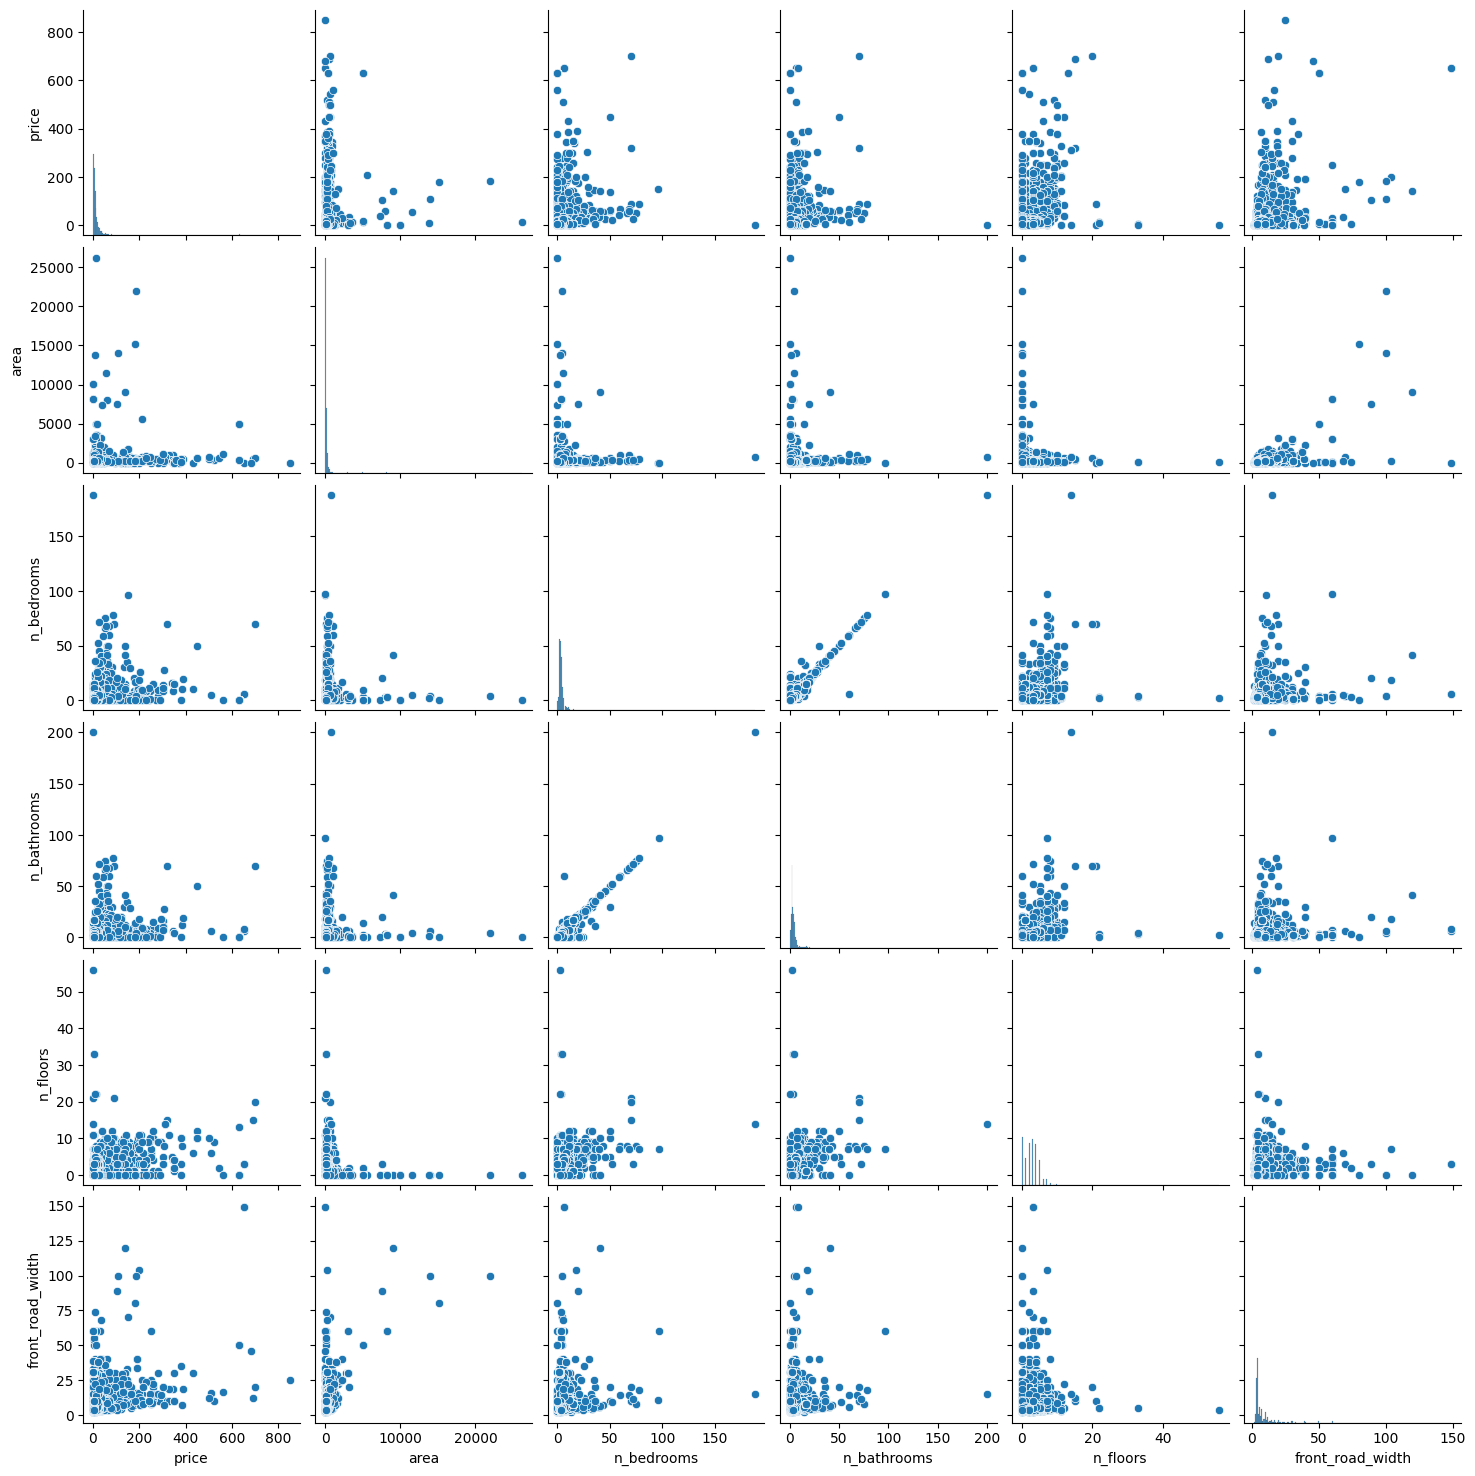

In [119]:
sns.pairplot(df[['price', 'area', 'n_bedrooms', 'n_bathrooms', 'n_floors', 'front_road_width']])
plt.show()

1. **Outlier Handling:**
   - Compared to the earlier chart, extreme outliers have been effectively mitigated. For example:
     - **`price`**: Very high-price outliers are less skewed.
     - **`area`**: The extremely large property areas are more constrained, improving clarity.
   - High but realistic values are still preserved, indicating that the filtering process does **not over-remove** valid observations.

2. **Correlation Visibility:**
   - Relationships are clearer due to better outlier treatment. For instance:
     - **`area` vs `price`**: The scatterplot now highlights a more consistent positive trend.
     - **`n_floors` vs `price`** and **`n_bedrooms` / `n_bathrooms` vs `price`** exhibit denser clusters, making underlying patterns easier to observe.

3. **Distribution Improvements:**
- Diagonal histograms display more meaningful ranges:
  - Reduced skewness for **`price`**, **`area`**, and room-related features.
  - Tighter interquartile ranges, indicating more stable central tendencies.

4. **Data Representation:**
   - Reduced variability in certain variables (e.g., `front_road_width`) likely results from filtering extreme cases or standardizing categories.